<div class="jumbotron jumbotron-fluid">
  <div class="container">
    <h1 class="display-4">Conception d'une application au service de la santé publique</h1>
    <p class="lead">L'Agence nationale de santé publique en France, Santé publique France souhaite trouver des idées innovantes d’applications en lien avec l'alimentation. Elle fait un appel à projet.</p>
      
      
   <a class="btn btn-primary btn-lg" href="https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv" role="button">Jeu de données</a>
  <hr class="my-4">
   
  </div>
</div>

<button type="button" class="btn btn-danger">Mission à réaliser </button>

Trouver une idée d'application et estimer la faisabilité d'exploiter la base de données de l’organisme <a href="https://world.openfoodfacts.org/data " role="button">“Open Food Facts</a>, contenant des informations sur plus de deux millions d'aliments pour la réalisation de cette application.


  
  

- Repérer les **variables pertinentes** pour les traitements à venir et nécessaires pour l'idée d’application.
- Nettoyer les données en : 
    - Mettant en évidence les éventuelles valeurs manquantes, avec au moins 3 méthodes de traitement adaptées aux variables concernées, 
    - Identifiant et en quantifiant les éventuelles valeurs aberrantes de chaque variable.
    - Automatisant ces traitements pour éviter de répéter ces opérations.
    
- Produire des **visualisations** afin de mieux comprendre les données.

- Effectuer une **analyse univariée** pour chaque variable intéressante afin de synthétiser son comportement.

- Confirmer ou infirmer les hypothèses à l’aide d’une **analyse multivariée**. 

- Effectuer les **tests statistiques** appropriés pour vérifier la significativité des résultats.

- Justifier  l'idée d’application. Identifier des arguments justifiant la **faisabilité (ou non)** de l’application à partir des données Open Food Facts.

- Rédiger un **rapport d’exploration** et pitcher votre idée durant la soutenance du projet.

<button type="button" class="btn btn-success">Idée d'application </button>
 
Prédiction du **nutri-score** pour tous les produits n'ayant pas cette information renseignées : L’apposition du Nutri-Score sur les produits est facultative. 

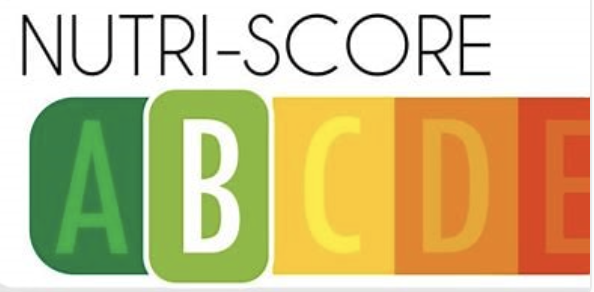

De nombreux entreprises et distributeurs choisissent de ne pas l’afficher, mais les valeurs nutritionnelles sont obligatoires. Par un simple scan du code-barre d'un produit sans nutri-score apposé, l'application devra prédire son nutri-score. La définition et les explication sur le calcul du nutri-score sont disponibles

Cette étude est organisée en deux notebooks:

- Notebook de **nettoyage**
- Notebook d'**analyse**

<p class="h1"; style="color:blue">Partie 1 - Nettoyage du Jeu de données </p>

<p class="h2"; style="color:green">Mise en place de l'environnement de Travail</p>

Nous commençons par mettre en place notre cadre de travail en effectuant les actions suivantes :

- Importation des librairies et packages Python nécessaires
- Importation des fonctions utiles implémentées
- Chargement du jeu de données

**Importation des librairies Python nécessaires**

In [1]:
!pip install wget

In [2]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
from IPython.display import display
import os

In [3]:
# Versions des librairies
print("Version librairie pandas: " + pd.__version__)
print("Version librairie numpy: " + np.__version__)
print("Version librairie matplotlib: " + matplotlib.__version__)
print("Version librairie seaborn: " + sns.__version__)
print("Version librairie missingno: " + msno.__version__)

Version librairie pandas: 1.4.1
Version librairie numpy: 1.20.3
Version librairie matplotlib: 3.5.1
Version librairie seaborn: 0.11.2
Version librairie missingno: 0.5.1


In [4]:
# Affichage d'un maximum de les lignes et colonnes

pd.set_option('display.max_column', 200)
#pd.set_option('display.max_rows', 500)

**Téléhargement du jeu de données à la source**

<a class="btn btn-primary btn-lg" href="https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv" role="button">Jeu de données</a>
<hr class="my-2">

In [5]:
# Téléchargement du jeu de données initiale depuis la source

"""
url="https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv"
df = pd.read_csv(url, sep='\t', low_memory=True)
"""

# data = pd.read_csv("en.openfoodfacts.org.products.csv", sep='\t', low_memory=True 

'\nurl="https://static.openfoodfacts.org/data/en.openfoodfacts.org.products.csv"\ndf = pd.read_csv(url, sep=\'\t\', low_memory=True)\n'

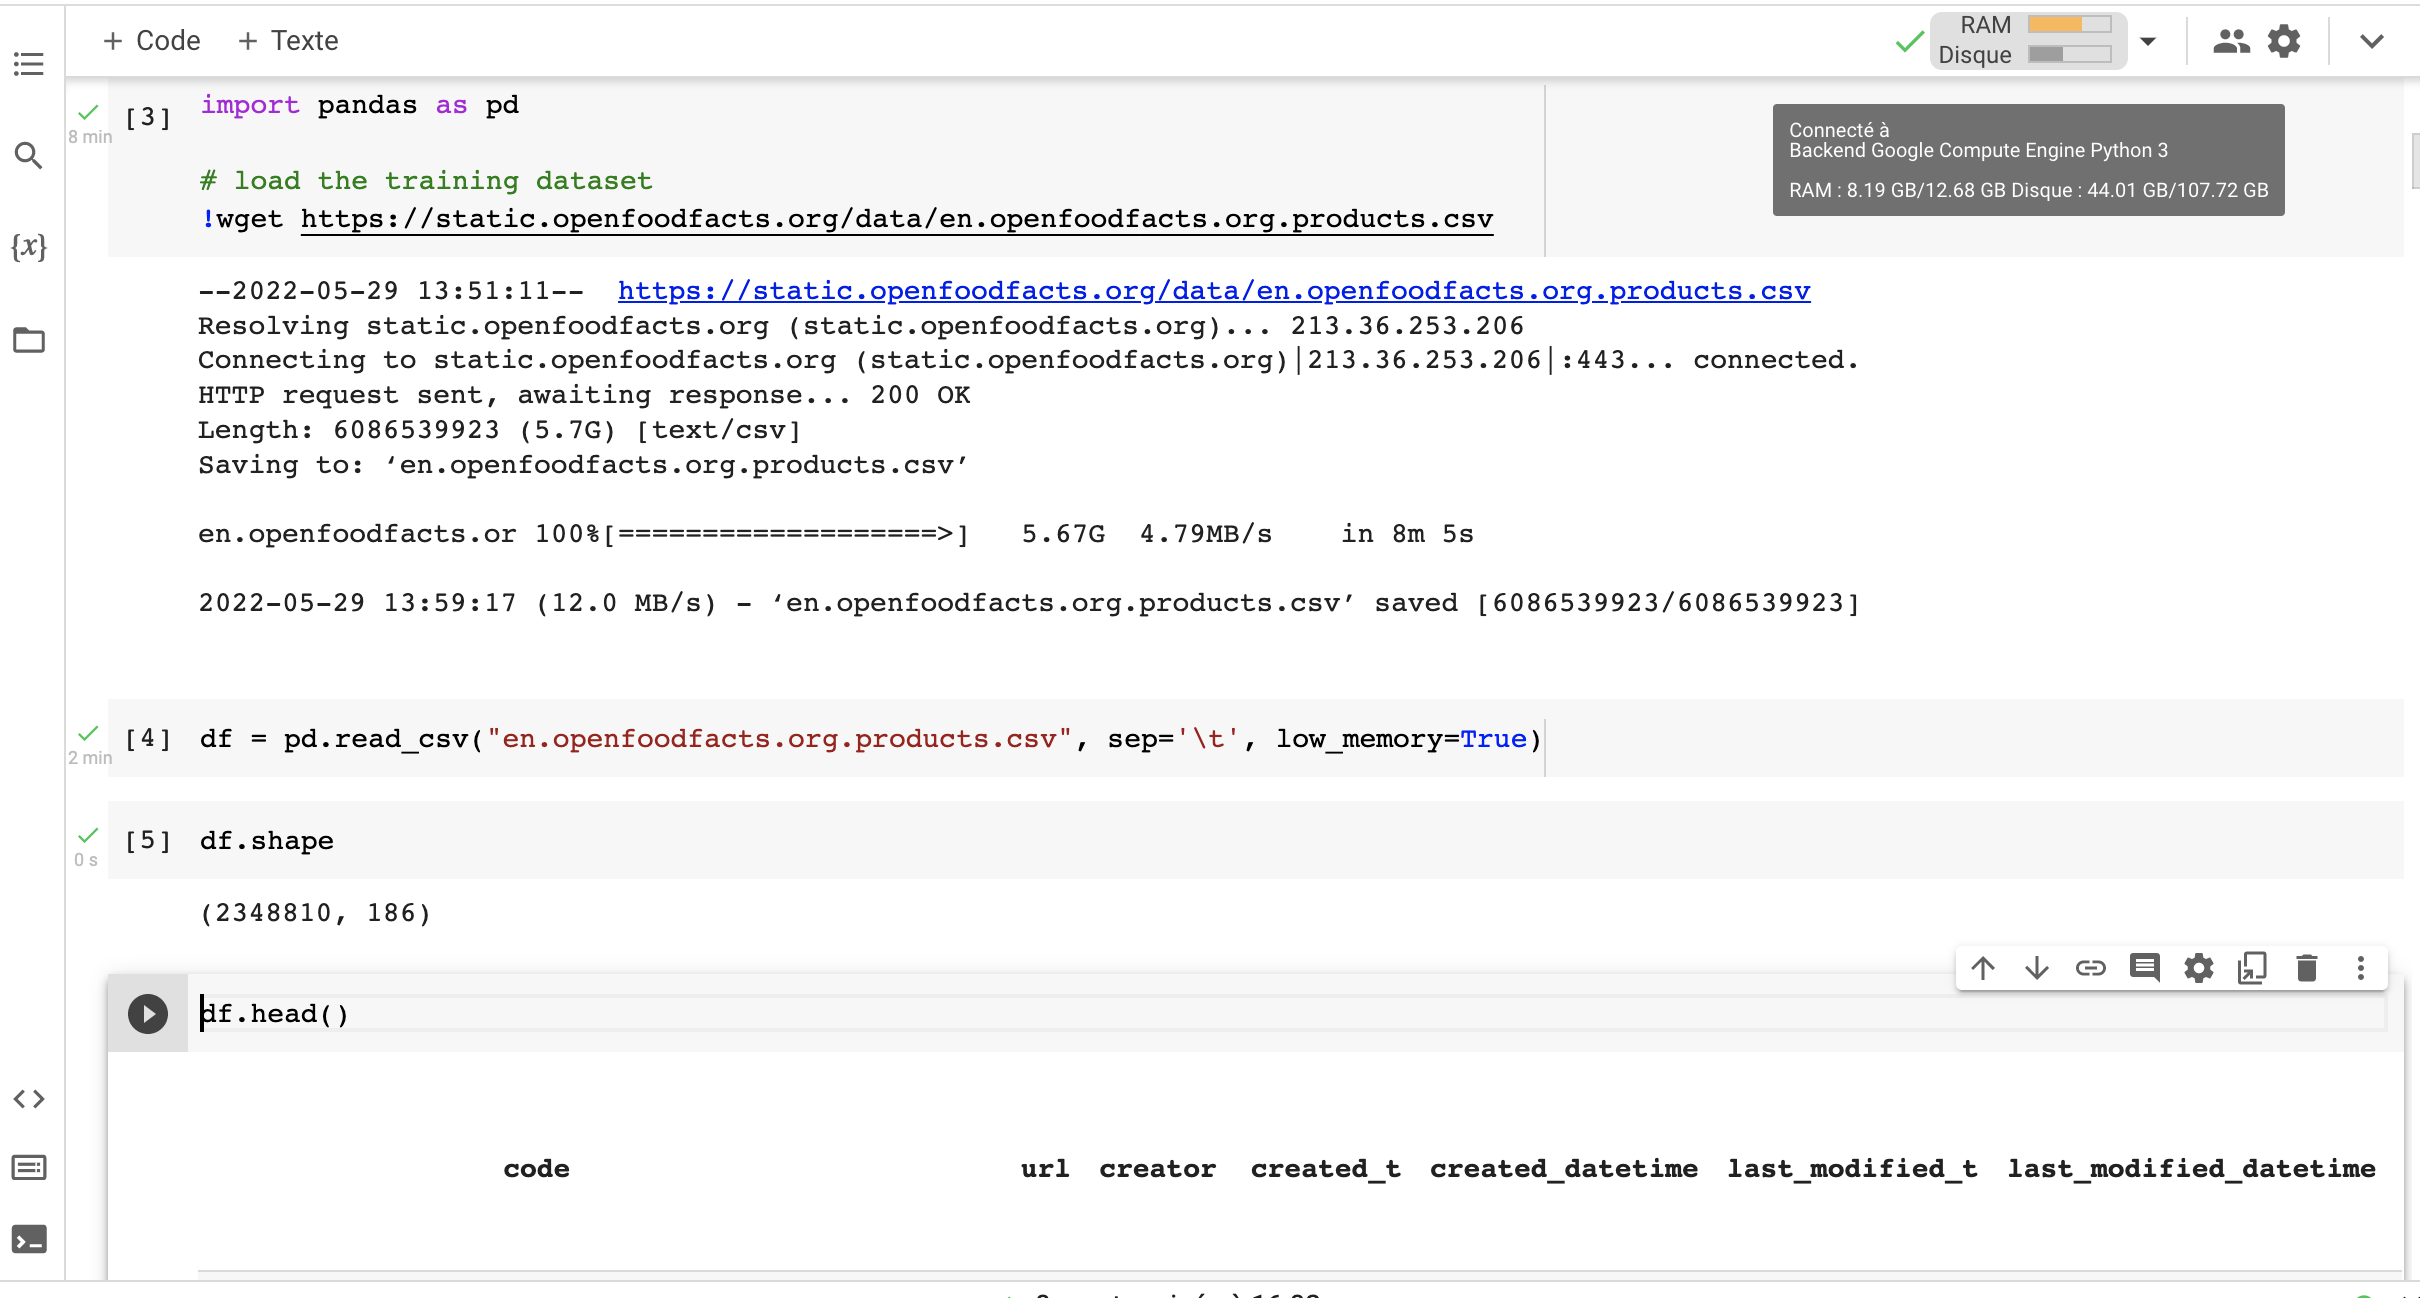

**Jeu de données initial** 
- Nombre d'obseversations (produits) :  2 338 250
- Nombre de variables : 186 
- Beaucoup de valeurs manquantes : 79,19% 




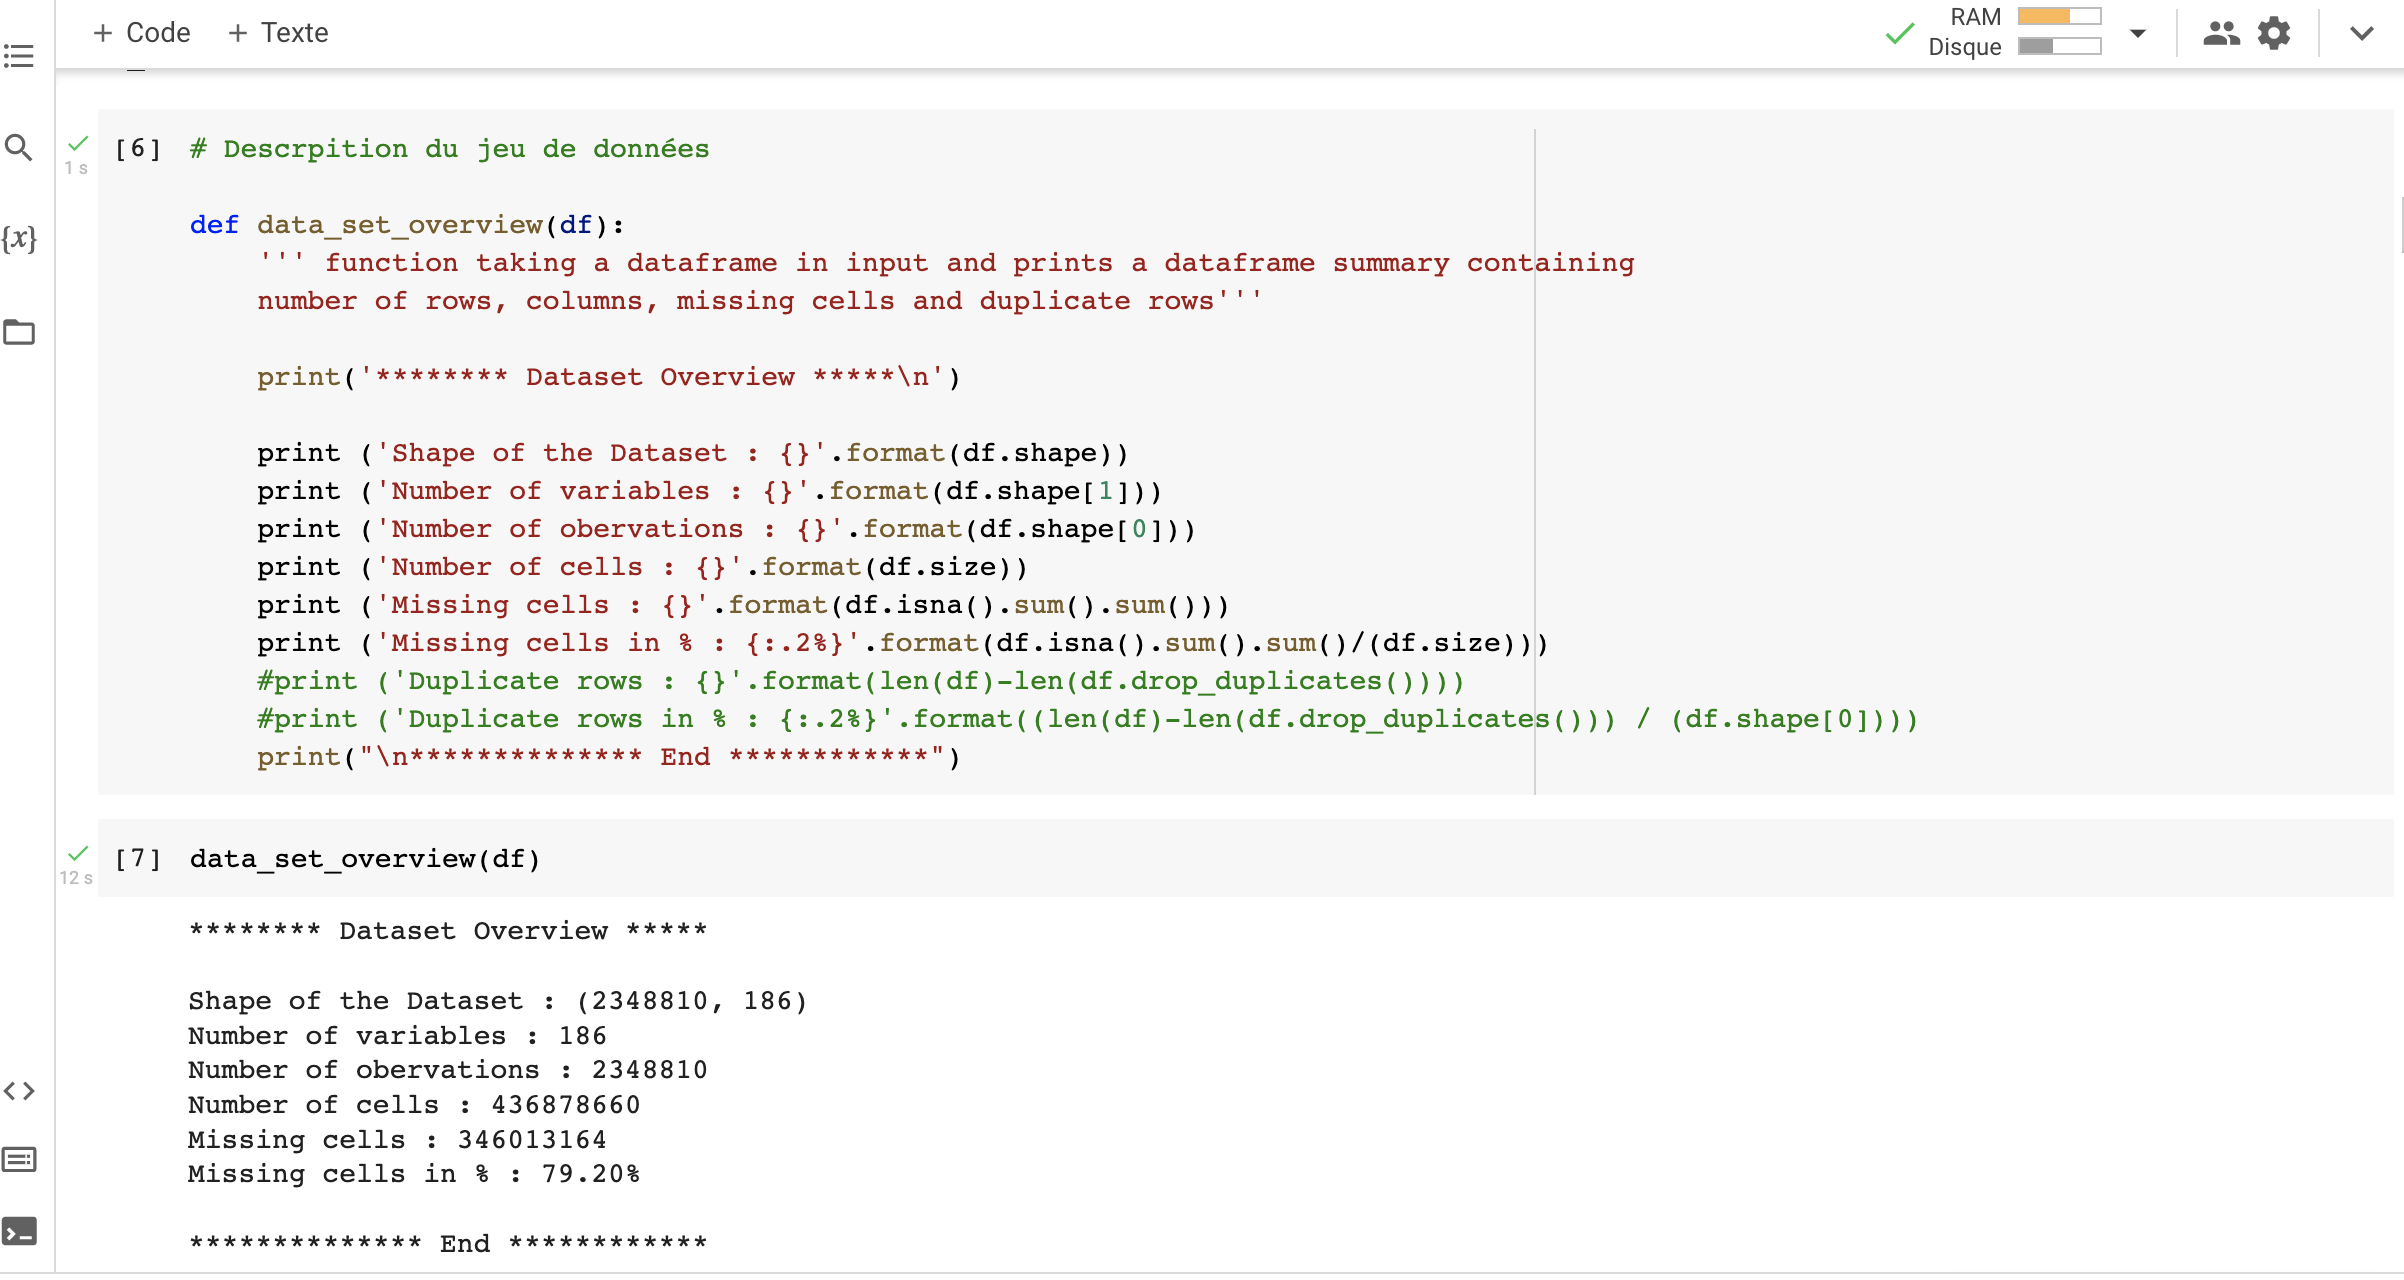

<p class="h2"; style="color:green">Analyse de forme la forme du Dataset</p>


<p class="h3"; style="color:blue">Analyse des colonnes du dataset</p

Fields that end **with _100g** correspond to the amount of a nutriment (in g, or kJ for energy) 
for 100 g or 100 ml of product


In [6]:
# les donneées disponibles par nutriment du dataset datafood
    
"""
data_100g = df.filter(like='_100g', axis=1)
data_100g.columns

Index(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',
       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',
       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',
       '-capric-acid_100g',
       ...
       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',
       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',
       'inositol_100g', 'carnitine_100g'],
"""      

"\ndata_100g = df.filter(like='_100g', axis=1)\ndata_100g.columns\n\nIndex(['energy-kj_100g', 'energy-kcal_100g', 'energy_100g',\n       'energy-from-fat_100g', 'fat_100g', 'saturated-fat_100g',\n       '-butyric-acid_100g', '-caproic-acid_100g', '-caprylic-acid_100g',\n       '-capric-acid_100g',\n       ...\n       'carbon-footprint-from-meat-or-fish_100g', 'nutrition-score-fr_100g',\n       'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g',\n       'choline_100g', 'phylloquinone_100g', 'beta-glucan_100g',\n       'inositol_100g', 'carnitine_100g'],\n"

In [7]:
# variables se terminant par 'tags'
 ## fields that end with _tags are comma separated list of tags
"""
data.columns[data.columns.str.endswith('_tags')]


Index(['packaging_tags', 'brands_tags', 'categories_tags', 'origins_tags',
       'manufacturing_places_tags', 'labels_tags', 'emb_codes_tags',
       'cities_tags', 'countries_tags', 'ingredients_tags', 'traces_tags',
       'additives_tags', 'food_groups_tags', 'states_tags'],
      dtype='object')
"""      

"\ndata.columns[data.columns.str.endswith('_tags')]\n\n\nIndex(['packaging_tags', 'brands_tags', 'categories_tags', 'origins_tags',\n       'manufacturing_places_tags', 'labels_tags', 'emb_codes_tags',\n       'cities_tags', 'countries_tags', 'ingredients_tags', 'traces_tags',\n       'additives_tags', 'food_groups_tags', 'states_tags'],\n      dtype='object')\n"

In [8]:
# variables se terminant par ('t') de type temps
# fields that end with _t are dates in the UNIX timestamp format (number of seconds since Jan 1st 1970)

"""
data.columns[data.columns.str.endswith('_t')
           
Index(['created_t', 'last_modified_t'], dtype='object')

"""

"\ndata.columns[data.columns.str.endswith('_t')\n           \nIndex(['created_t', 'last_modified_t'], dtype='object')\n\n"


<p class="h3"; style="color:blue">Application de la méthode de l'entonoir pour réduire la taille du jeu de données</p

Ulisation d'un notebook sur google collab : https://colab.research.google.com/drive/1DDSI3CQ_X_QBA467xdODra2fRiG1Cgdt#scrollTo=51T8GE_xx28z 

**----> 1. Restriction aux colonnes ayant un taux de remplissage >= 20%**
Observation (utilisation de **missigno**) beaucoup de colonnes contiennent très peu de données (taux de remplissage < 40% pour la plupart des colonnes).

In [9]:
"""

data_nan20_filtered = data.loc[:, (1 - data.isnull().mean()) >=.25]

df1 = data_nan20_filtered
"""

# Ce 1er filtre nous permis de réduire la taille du jeu de données à : (2345443, 58)
# Proportion de NaN : 38.11 %

'\n\ndata_nan20_filtered = data.loc[:, (1 - data.isnull().mean()) >=.25]\n\ndf1 = data_nan20_filtered\n'

**---> 2. Restriction des données aux produits vendus en France** : Etant données que notre application aura pour cible uniquement les **produits vendus en France**, nous allons effectuer un premier filtre sur notre jeu de données en conséquence en utilisant du regex sur le mot france.

En effet, l'appel à projet pour trouver des idées innovantes d’applications en lien avec l'alimentation vient de l'agence "**Santé publique France**", il ne faut donc garder que les produits vendus en France.

In [10]:
"""
data_france_regex = df1[df1["countries_tags"].str.contains('france', regex=True)==True]

df2 = data_france_regex
"""

# Ce 2nd filtre nous permis de réduire la taille du jeu de données à : (901500, 58)
# Proportion de NaN : 36.29 % 

'\ndata_france_regex = df1[df1["countries_tags"].str.contains(\'france\', regex=True)==True]\n\ndf2 = data_france_regex\n'

***---> 3. Suppression des colonnes redondantes et des colonnes non pertinentes pour notre choix d'analyse***
    

Pour notre analyse nous avons décidé de nous focaliser sur les colonnes relatives aux :
- Groupes alimentaires (PNNS et NOVA)
- Valeurs nutritionnelles

Nous allons éliminer les variables (colonnes):
- Les colonnes jugées non pertinentes pour l'analyse : par exemple la quantité, la marque, la catégorie, le pays, le label, les additifs, etc....)
- Les colonnes eedondantes (celles qui correspondent à des colonnes dont les noms sont différents mais donnent la même information (les colonnes _en ou _tags par exemple)).
- Certaines colonnes contiennent les mêmes valeurs que d'autres colonnes ("energy-kcal_100" et "energy_100g", "nutriscore-score-fr_100g" et "nutriscore_score").Il n'est donc pas nécessaire de conserver les deux colonnes.

**Notre objectif** est de ne retenir que les **colonnes qui sont pertinentes** pour la prédiction du nutri-score

In [11]:
# Filtrage des features / Features selection
"""
cols_to_keep  = ['code', 'creator', 'created_datetime', 'product_name', 'quantity',
                'brands', 'categories', 'labels','countries', 
                 'pnns_groups_1', 'pnns_groups_2',  'nutriscore_grade','ecoscore_grade', 
                
                'additives_n', 'nutriscore_score', 'nova_group','ecoscore_score', 
                'energy_100g', 'energy-kcal_100g', 'fat_100g','saturated-fat_100g','carbohydrates_100g',
                'sugars_100g', 'fiber_100g', 'proteins_100g','salt_100g', 'sodium_100g',
                'fruits-vegetables-nuts-estimate-from-ingredients_100g','nutrition-score-fr_100g']

data_cols_toKeep = df2[cols_to_keep]

df3 = data_cols_toKeep
"""


# Ce 1er filtre nous permis de réduire la taille du jeu de données à : (901500, 29)
# Proportion de NaN : 38.11 %

"\ncols_to_keep  = ['code', 'creator', 'created_datetime', 'product_name', 'quantity',\n                'brands', 'categories', 'labels','countries', \n                 'pnns_groups_1', 'pnns_groups_2',  'nutriscore_grade','ecoscore_grade', \n                \n                'additives_n', 'nutriscore_score', 'nova_group','ecoscore_score', \n                'energy_100g', 'energy-kcal_100g', 'fat_100g','saturated-fat_100g','carbohydrates_100g',\n                'sugars_100g', 'fiber_100g', 'proteins_100g','salt_100g', 'sodium_100g',\n                'fruits-vegetables-nuts-estimate-from-ingredients_100g','nutrition-score-fr_100g']\n\ndata_cols_toKeep = df2[cols_to_keep]\n\ndf3 = data_cols_toKeep\n"

**---> Sauvegarde du jeu de données filtrée en utulisant la méthode de l'entonoir**

In [12]:
"""

df3.to_csv('openfoodfacts_data_entonnoir_filtered.csv')

"""

"\n\ndf3.to_csv('openfoodfacts_data_entonnoir_filtered.csv')\n\n"

<p class="h3"; style="color:blue">Jeu de données filtré </p>

In [13]:
# Chargement du jeu de données filtré

import pandas as pd 
data = pd.read_csv("openfoodfacts_data_entonnoir_filtered.csv", low_memory=True)

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3331041919.py:4: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("openfoodfacts_data_entonnoir_filtered.csv", low_memory=True)


In [14]:
def info_generales(dataframe):
    lignes = dataframe.shape[0] 
    colonnes = dataframe.shape[1]
    
    print("Le jeu de données a {} lignes et {} colonnes.\n".format(lignes,colonnes))
    dataframe.info()

In [15]:
# Informations sur le jeu de données

info_generales(data)

Le jeu de données a 901500 lignes et 31 colonnes.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 901500 entries, 0 to 901499
Data columns (total 31 columns):
 #   Column                                                 Non-Null Count   Dtype  
---  ------                                                 --------------   -----  
 0   Unnamed: 0                                             901500 non-null  int64  
 1   code                                                   901500 non-null  object 
 2   creator                                                901499 non-null  object 
 3   created_t                                              901500 non-null  int64  
 4   created_datetime                                       901500 non-null  object 
 5   product_name                                           877099 non-null  object 
 6   quantity                                               290936 non-null  object 
 7   brands                                                 466851 non-nu

In [16]:
# Affichage des 05 premières lignes

data.head()

,Unnamed: 0,code,creator,created_t,created_datetime,product_name,quantity,brands,categories,labels,countries,pnns_groups_1,pnns_groups_2,nutriscore_grade,ecoscore_grade,additives_n,nutriscore_score,nova_group,ecoscore_score,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,fruits-vegetables-nuts-estimate-from-ingredients_100g,nutrition-score-fr_100g
0,0,00000000000000225,nutrinet-sante,1623855208,2021-06-16T14:53:28Z,jeunes pousses,NaN,endives,NaN,NaN,en:france,unknown,unknown,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,0000000000017,kiliweb,1529059080,2018-06-15T10:38:00Z,Vitória crackers,NaN,NaN,NaN,NaN,France,unknown,unknown,NaN,unknown,NaN,NaN,NaN,NaN,1569.0,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,0.560,NaN,NaN
2,3,0000000000031,isagoofy,1539464774,2018-10-13T21:06:14Z,Cacao,130 g,NaN,NaN,NaN,France,unknown,unknown,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,8,0000000000100,del51,1444572561,2015-10-11T14:09:21Z,moutarde au moût de raisin,100g,courte paille,"Epicerie, Condiments, Sauces, Moutardes",Delois france,France,Fat and sauces,Dressings and sauces,d,c,0.0,18.0,NaN,55.0,936.0,NaN,8.2,2.20,29.0,22.0,0.0,5.1,4.60,1.840,0.0,18.0
4,9,0000000000123,kiliweb,1535737982,2018-08-31T17:53:02Z,Sauce Sweety chili 0%,NaN,NaN,NaN,NaN,France,unknown,unknown,NaN,unknown,NaN,NaN,NaN,NaN,88.0,21.0,0.0,0.00,4.8,0.4,NaN,0.2,2.04,0.816,NaN,NaN


In [17]:
# Fonction permettant d'avoir une description du dataset

def data_set_overview(df):
    ''' function taking a dataframe in input and prints a dataframe summary containing
    number of rows, columns, missing cells and duplicate rows'''
    
    print('******** Dataset Overview *****\n')
    
    print ('Shape of the Dataset : {}'.format(df.shape))
    print ('Number of variables : {}'.format(df.shape[1]))
    print ('  - Num. Quant variables : {}'.format(len(df.select_dtypes(include=["float64","int64"]).columns)))
    print ('  - Num. Quali variables : {}'.format(len(df.select_dtypes(include=["object"]).columns)))
    print ('Number of obervations : {}'.format(df.shape[0]))
    print ('Number of cells : {}'.format(df.size))
    print ('Missing cells : {}'.format(df.isna().sum().sum()))
    print ('Missing cells in % : {:.2%}'.format(df.isna().sum().sum()/(df.size)))
    print ('Duplicate rows : {}'.format(len(df)-len(df.drop_duplicates())))
    print ('Duplicate rows in % : {:.4%}'.format((len(df)-len(df.drop_duplicates())) / (df.shape[0])))
    print("\n************** End ************")

In [18]:
data_set_overview(data)

******** Dataset Overview *****

Shape of the Dataset : (901500, 31)
Number of variables : 31
  - Num. Quant variables : 18
  - Num. Quali variables : 13
Number of obervations : 901500
Number of cells : 27946500
Missing cells : 9100243
Missing cells in % : 32.56%
Duplicate rows : 0
Duplicate rows in % : 0.0000%

************** End ************


<p class="h3"; style="color:blue">Definition des variables </p>


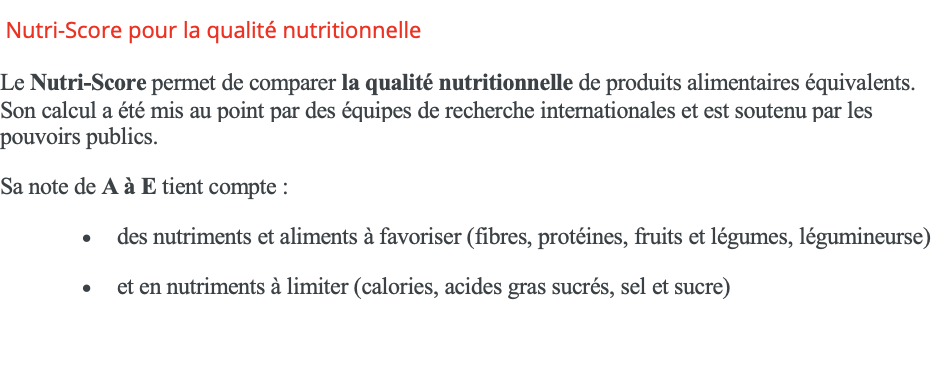

**Objectif** :  L'objectif du projet est de prédire le nutri-score

Pour établir le **classement d'un aliment**, les fabricants et les distributeurs du secteur alimentaire se conforment aux règles de calcul suivantes à mettre en oeuvre successivement:

- Le calcul d’un score nutritionnel de l’aliment.
- Le classement de l’aliment dans l’échelle nutritionnelle à cinq couleurs sur la base du score calculé.
- Le calcul du score nutritionnel des aliments est calculé de façon identique pour tous les aliments, sauf pour les fromages, les matières grasses végétales ou animales, les boissons.

In [19]:
# Listing des variables

data.columns

Index(['Unnamed: 0', 'code', 'creator', 'created_t', 'created_datetime',
       'product_name', 'quantity', 'brands', 'categories', 'labels',
       'countries', 'pnns_groups_1', 'pnns_groups_2', 'nutriscore_grade',
       'ecoscore_grade', 'additives_n', 'nutriscore_score', 'nova_group',
       'ecoscore_score', 'energy_100g', 'energy-kcal_100g', 'fat_100g',
       'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g',
       'fruits-vegetables-nuts-estimate-from-ingredients_100g',
       'nutrition-score-fr_100g'],
      dtype='object')



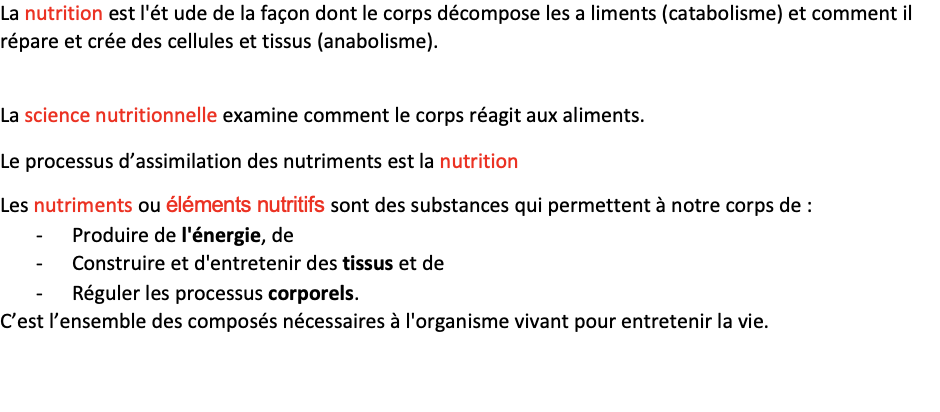


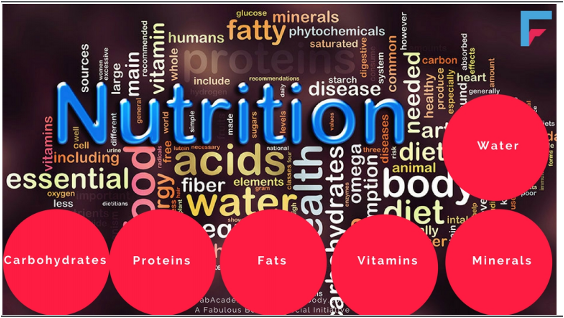

### Nutrition facts
- **energy_100g** ( energie ) : Comme une voiture a besoin d’essence pour rouler, notre corps a besoin d’énergie pour vivre et effectuer les tâches du quotidien. Cette énergie se mesure en calories.
    - Les nutriments énergétiques sont les protéines, les lipides, les glucides et l'alcool. Ils fournissent à l'organisme l'énergie dont il a besoin, mais certains, comme les protéines, ont aussi un rôle constructeur. 
    - Pour un homme adulte, l'apport conseillé en énergie est, en moyenne, de 2 400 à 2 600 calories par jour, selon l'activité. Pour une femme adulte, il est de 1 800 à 2 200 calories.
- **energy-kcal_100g** : Notre corps a besoin d’énergie pour vivre, et cette énergie nous est fournie par les aliments sous forme de calories. Comme on les compte par milliers, l’unité utilisée est la kilocalorie (= 1.000 calories), que l’on note kcal ou Cal. Par abus de langage, on continue d’utiliser le terme « calories » à la place de « kilocalories »


**Macronutriments** qui sont nécessaire en grande quantité
- **proteins_100g** ( Protéines --> les matériaux de construction de l'organisme ) :  Les protéines sont des macronutriments à la base de tout organisme vivant. Essentielles à l'organisme, elles y jouent un rôle structural (au niveau musculaire ou encore cutané) mais sont également impliquées dans de très nombreux processus tels que la réponse immunitaire (anticorps), le transport de l'oxygène dans l'organisme (hémoglobine), ou encore la digestion (enzymes digestives)"


- **fat_100g** ( graisse / lipides ) : la réserve en graisse de l’organisme
    - **saturated-fat_100g** ( acides gras saturés / graisses saturés ):  ce sont des graisse naturellement faites pour supporter la chaleur (ils peuvent facilement être utilisé pour la cuisson). elles proviennent des animaux, du beurre, de la creme, etc


- **carbohydrates_100g** ( glucides / glucose -> le stockage d’énergie limité de l'organisme) : Aussi nommés carbohydrates, les glucides sont des sucres. Ils représentent 50 à 55% de la ration énergétique totale nécessaire pour que le corps humain puisse fonctionner normalement. Ils sont transformés en énergie utilisée par l’organisme et en particulier par notre cerveau.
    - **sugars_100g** ( sucres ) : Le sucre est la forme la plus simple, le plus petit maillon de la famille des glucides. Ils donnent ce goût sucré aux aliments.

**Les sels minéraux**
- **salt_100g** ( sel ) : un sel est un composé ionique de cations et d'anions formant un produit neutre et sans charge électrique nette. La consommation de sel et d’aliments salés augmente aussi le risque de cancer et d’ulcère de l’estomac. En effet, le sel contribue à attaquer et endommager la paroi de l’estomac  
    - **sodium_100g** ( sodium -->  Il joue un rôle clé dans le fonctionnement normal des nerfs et des muscles et ermet de maintenir un équilibre liquidien normal) : Le sodium est un minéral très présent dans l'organisme. Le sodium, de symbole chimique (Na), est un élément minéral majeur indispensable à la vie, au même titre que le potassium, le chlore ou le calcium. Il est en général associé au chlore sous forme de chlorure de sodium (NaCl) : c'est notre sel de table. Pour être en bonne santé, l'organisme humain a besoin d'une petite quantité de sodium; en trop grande quantité, le sodium peut provoquer l'hypertension artérielle, un important facteur de risque d'accident vasculaire cérébral, de maladie cardiaque et de maladie rénale.
    
 

- **fiber_100g** ( fibres --> glucides présents dans les aliments végétaux) :  les fibre alimentaires représentent  les glucides et la lignine qui sont présent naturellement dans les aliments végétaux et qui ne sont pas digéré et absorbés par le système digestif 

 
**additives_n** : number of food additives 

### Products catégory
- **pnns_groups_1** :
- **pnns_groups_2** :
- **nova_group** :

#### Variable y  = Colonne target
- nutriscore_grade
- ecoscore_grade
- nutriscore_score  
- ecoscore_score


<p class="h3"; style="color:blue"> Mise en forme du jeu de données </p>

**Objectif** :  Transformer nos données pour les mettre dans un format propice à l'exploration

In [20]:
df = data.copy()

In [21]:
# Suppression des Colonnes inutulies pour l'analyse 

df = df.drop(columns=['Unnamed: 0', 'created_datetime',
                      'fruits-vegetables-nuts-estimate-from-ingredients_100g',
                     'creator', 'quantity', 'brands', 'categories', 'labels', 'countries',
                     ])

In [22]:
# Affichage des premières lignes du dataset

df.head(1)

,code,created_t,product_name,pnns_groups_1,pnns_groups_2,nutriscore_grade,ecoscore_grade,additives_n,nutriscore_score,nova_group,ecoscore_score,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
0,00000000000000225,1623855208,jeunes pousses,unknown,unknown,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
# Reorganisation du dataset

df = df[['code', 'product_name','created_t',
        'pnns_groups_1','pnns_groups_2', 'nova_group', 'nutriscore_grade', 'ecoscore_grade', 
        'additives_n', 'energy_100g','energy-kcal_100g', 
        'fat_100g', 'saturated-fat_100g','carbohydrates_100g', 'proteins_100g',
        'sugars_100g', 'fiber_100g', 'salt_100g', 'sodium_100g', 
        'ecoscore_score','nutriscore_score']]

In [24]:
# Listing des colonnes/variables

df.columns

Index(['code', 'product_name', 'created_t', 'pnns_groups_1', 'pnns_groups_2',
       'nova_group', 'nutriscore_grade', 'ecoscore_grade', 'additives_n',
       'energy_100g', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',
       'salt_100g', 'sodium_100g', 'ecoscore_score', 'nutriscore_score'],
      dtype='object')

In [25]:
# Listing des variables quantitatives 

quantitative_cols = df.select_dtypes(include=["float64","int64"]).columns
quantitative_cols

Index(['created_t', 'nova_group', 'additives_n', 'energy_100g',
       'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',
       'salt_100g', 'sodium_100g', 'ecoscore_score', 'nutriscore_score'],
      dtype='object')

In [26]:
# Listing des varaiables qualitatives

categorical_cols = df.select_dtypes(include=["object"]).columns
categorical_cols

Index(['code', 'product_name', 'pnns_groups_1', 'pnns_groups_2',
       'nutriscore_grade', 'ecoscore_grade'],
      dtype='object')

**Normatisation des variabbles catégorielle**

In [27]:
# Corriger les noms des produits et catégories de produits pour mieux détecter les doublons
    #df[col] = df[col].str.replace('-', ' ')
    #df[col] = df1[col].str.lower()
    #df[col] = df1[col].str.capitalize()

df["product_name"] = df["product_name"].str.replace('-', ' ').str.lower().str.capitalize()

df["pnns_groups_1"] = df["pnns_groups_1"].str.replace('-', ' ').str.lower().str.capitalize()
df["pnns_groups_2"] = df["pnns_groups_2"].str.replace('-', ' ').str.lower().str.capitalize()


df["nutriscore_grade"] = df["nutriscore_grade"].str.capitalize()

**Formatage des variables de type date**

In [28]:
# Corriger le formatage des colonnes dates en type date
# df["created_t'"] = pd.to_datetime(df["created_t"], format="%Y-%m-%d %H:%M:%S.%f", utc=True)

df['created_t'] = pd.to_datetime(df['created_t'], unit='s', errors='coerce')

In [29]:
df.head()

,code,product_name,created_t,pnns_groups_1,pnns_groups_2,nova_group,nutriscore_grade,ecoscore_grade,additives_n,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,ecoscore_score,nutriscore_score
0,00000000000000225,Jeunes pousses,2021-06-16 14:53:28,Unknown,Unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000000017,Vitória crackers,2018-06-15 10:38:00,Unknown,Unknown,NaN,NaN,unknown,NaN,1569.0,375.0,7.0,3.08,70.1,7.8,15.0,NaN,1.40,0.560,NaN,NaN
2,0000000000031,Cacao,2018-10-13 21:06:14,Unknown,Unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0000000000100,moutarde au moût de raisin,2015-10-11 14:09:21,Fat and sauces,Dressings and sauces,NaN,D,c,0.0,936.0,NaN,8.2,2.20,29.0,5.1,22.0,0.0,4.60,1.840,55.0,18.0
4,0000000000123,Sauce sweety chili 0%,2018-08-31 17:53:02,Unknown,Unknown,NaN,NaN,unknown,NaN,88.0,21.0,0.0,0.00,4.8,0.2,0.4,NaN,2.04,0.816,NaN,NaN


In [30]:
data_set_overview(df)

******** Dataset Overview *****

Shape of the Dataset : (901500, 21)
Number of variables : 21
  - Num. Quant variables : 14
  - Num. Quali variables : 6
Number of obervations : 901500
Number of cells : 18931500
Missing cells : 5744166
Missing cells in % : 30.34%
Duplicate rows : 4
Duplicate rows in % : 0.0004%

************** End ************


Après la mise en forme de nos données, nous retouvons des doublons dans le nouveau dataset mis en forme

In [31]:
# Fonction permettant de supprimer les valeurs dupliquées du dataset
def cleaning_duplicate(dataframe):
    before = len(dataframe)
    dataframe = dataframe.drop_duplicates(subset='code')
    #dataframe = dataframe.drop_duplicates(subset='product_name')
    after = len(dataframe)
    print("Il y a {} duplicats qui ont été retirés du jeu de données" .format(before-after)) 
    print("\n")

In [32]:
df1 = cleaning_duplicate(df)

Il y a 182 duplicats qui ont été retirés du jeu de données




<p class="h3"; style="color:blue">Analyse des valeurs manquantes </p>

In [33]:
# Fonction qui renvoie la proportion de NaN sur l'ensemble du dataset

def print_proportion_nan(df):
        print('Taille du jeu de données ', df.shape)
        print(' --> Proportion de NaN : {:.2%}'.format(df.isna().sum().sum()/(df.shape[0]*df.shape[1])))
        
              
        return None

In [34]:
print_proportion_nan(df)

Taille du jeu de données  (901500, 21)
 --> Proportion de NaN : 30.34%


In [35]:
# Description des valeurs manquantes

def ms_values_overview(dataframe):
    '''function that takes a dataframe as input and output a dataframe containing variables types, 
    number of missing values and percentaage  of missing'''

    print ("\n               ********************** Missing Value Summary *****************              \n")
    #print ('Number of obervations : {}'.format(dataframe.shape[0]))
    #print(' --> Proportion de NaN : {:.2%}'.format(df.isna().sum().sum()/(df.shape[0]*df.shape[1])))
    
    summary = pd.DataFrame(dataframe.dtypes)
    summary = summary.rename(columns={0:'Variable type'})
    
    summary["Is Missing ? "] = dataframe.isna().any()
    summary["Count Missing"] = dataframe.isnull().sum()
    summary["Count Notnull"] = dataframe.notnull().sum()
    summary["Missing"] = dataframe.isna().mean()
    summary["% of Missing"] = round(100*(dataframe.isna().mean()))
    
    return summary.sort_values(by=['Count Missing'])

In [36]:
ms_values_overview(df)


               ********************** Missing Value Summary *****************              



,Variable type,Is Missing ?,Count Missing,Count Notnull,Missing,% of Missing
code,object,False,0,901500,0.000000,0.0
created_t,datetime64[ns],False,0,901500,0.000000,0.0
pnns_groups_2,object,True,448,901052,0.000497,0.0
pnns_groups_1,object,True,450,901050,0.000499,0.0
ecoscore_grade,object,True,643,900857,0.000713,0.0
product_name,object,True,24401,877099,0.027067,3.0
energy_100g,float64,True,204058,697442,0.226354,23.0
saturated-fat_100g,float64,True,205623,695877,0.228090,23.0
sugars_100g,float64,True,205961,695539,0.228465,23.0
proteins_100g,float64,True,208317,693183,0.231078,23.0



               ********************** Missing Value Summary *****************              



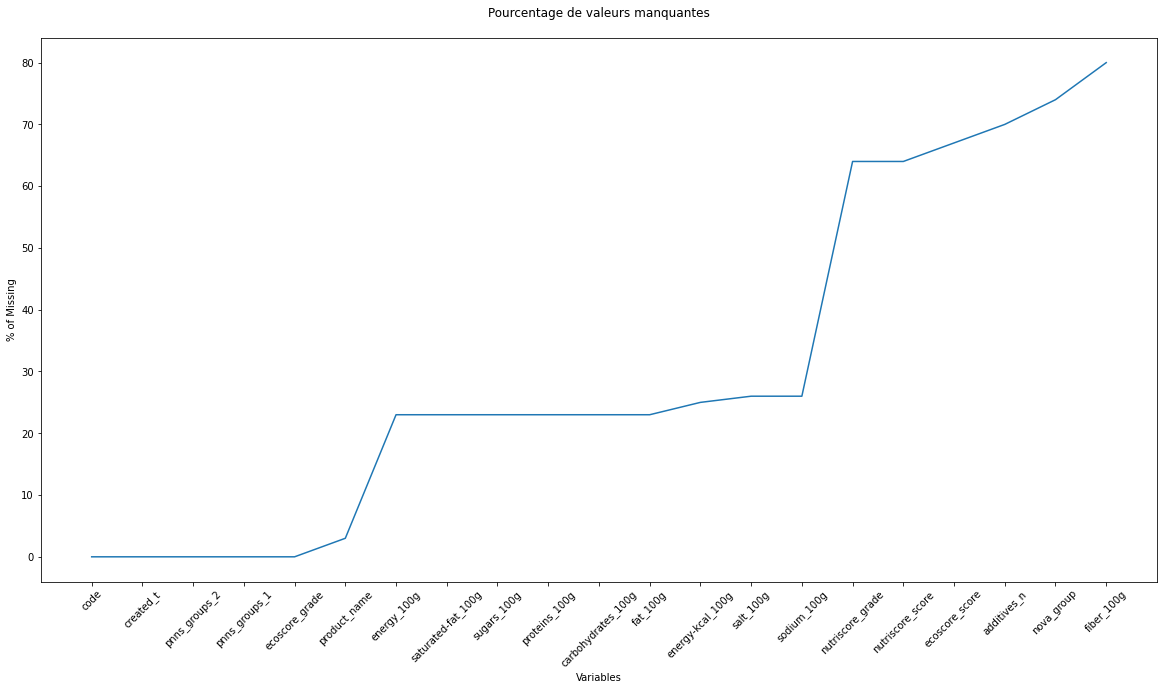

In [37]:
# % Visualisation des valeurs manquantes

import matplotlib.pyplot as plt

to_plot = ms_values_overview(df)

#row selected values 
x_labels = to_plot.index
y_values = to_plot['% of Missing']


fig = plt.figure(figsize=(20,10))
ax = plt.axes()

plt.xticks(rotation=45)

plt.plot(x_labels, y_values)
plt.title("Pourcentage de valeurs manquantes\n")
plt.xlabel('Variables')
plt.ylabel('% of Missing')

plt.show()

<AxesSubplot:>

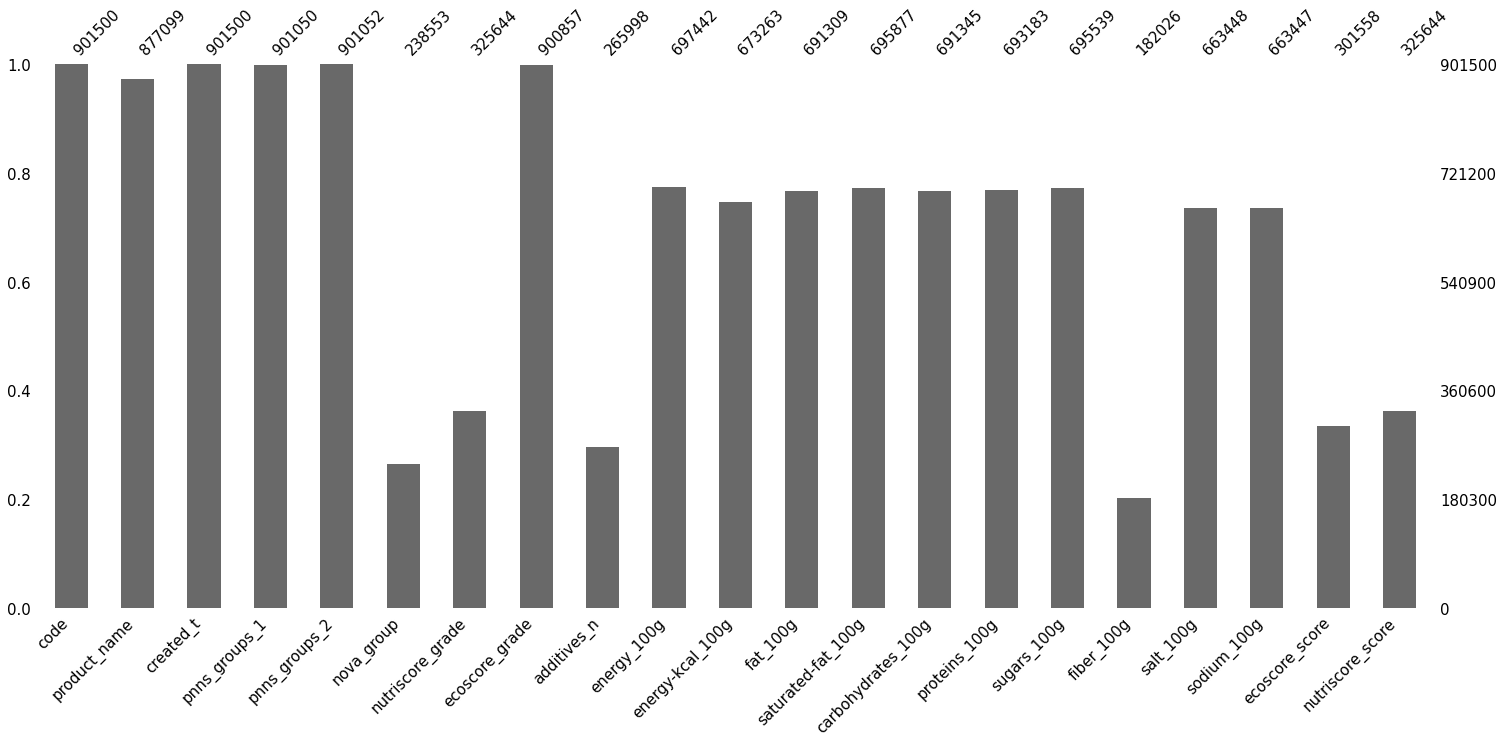

In [38]:
# msno.bar(df)
msno.bar(df, figsize=(25,10) , fontsize=15)

<AxesSubplot:>

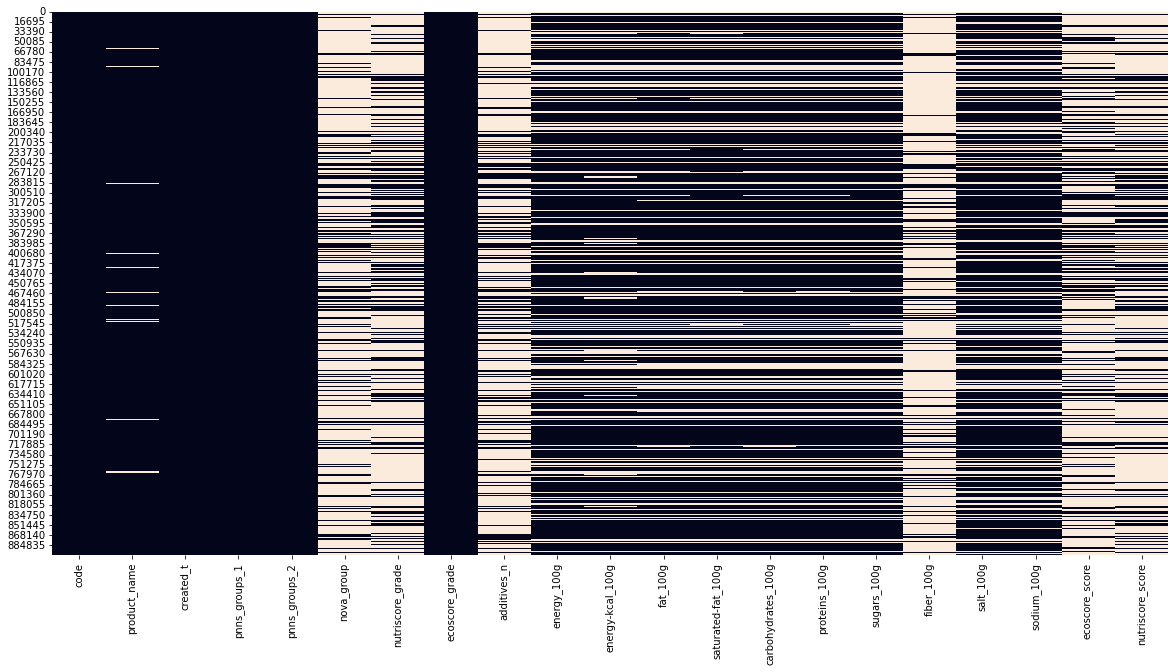

In [39]:
# Heatmap des valeurs manquantes

plt.figure(figsize=(20,10))
sns.heatmap(df.isna(), cbar=False)

On remarque qu'il y a toujours beaucoup de données manquantes dans notre jeu de données. Certaines colonnes sont moins rempli alors que d'autres sont totalement complètes. Ce graphique nous permet de voir globalement la répartition des données manquantes.

In [40]:
def pie_NaN(dataframe):
    lignes = dataframe.shape[0] 
    colonnes = dataframe.shape[1]
    
    # nombre de données non manquante
    nb_data = dataframe.count().sum()
    
    # nombre de données totale de ce jeu de données (colonnes*lignes)
    nb_totale = (colonnes*lignes)
    
 #taux remplissage jeu de données
    rate_dataOK = (nb_data/nb_totale)

     
# Pie Plot
    rates = [rate_dataOK, 1 - rate_dataOK]
    labels = ["Données", "NAN"]
    
    explode =(0,0.1) 
    colors = ['green', 'red']

#Plot
    plt.figure(figsize=(5,8))
    plt.pie(rates, explode=explode, labels=labels, colors=colors, autopct='%.2f%%',
        shadow=True, textprops={'fontsize': 10})

    #ttl=plt.title("Taux de remplissage du jeu de données", fontsize = 12)
    #ttl.set_position([0.5, 0.85])

    plt.axis('equal')

#ax.legend(labels, loc = "upper right", fontsize = 18)
    plt.tight_layout() 

    plt.show()

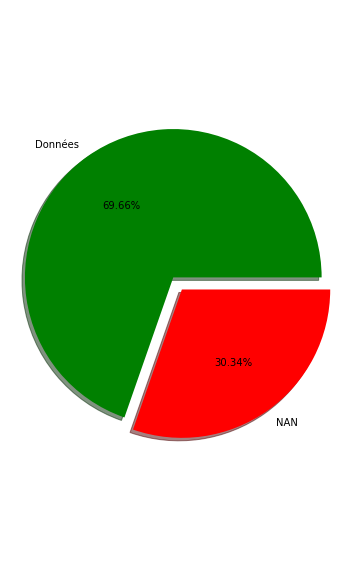

In [41]:
pie_NaN(df)

In [42]:
# **Répartition des données entre les variables des colonnes**

def graphe_remplissage_variable(df):
  # Répartition du taux de remplissage des colonnes: 
    df = pd.DataFrame(round(df.shape[0] - df.isna().sum())/df.shape[0],
                    columns=['Taux de remplissage']).sort_values('Taux de remplissage', 
                                                                 ascending=False).reset_index()
    fig, ax = plt.subplots(figsize=(20,12))
    sns.barplot(y=df['index'], x='Taux de remplissage', data=df)
    plt.title('Taux de remplissage des variables en %\n', fontsize = 15)
    plt.show()

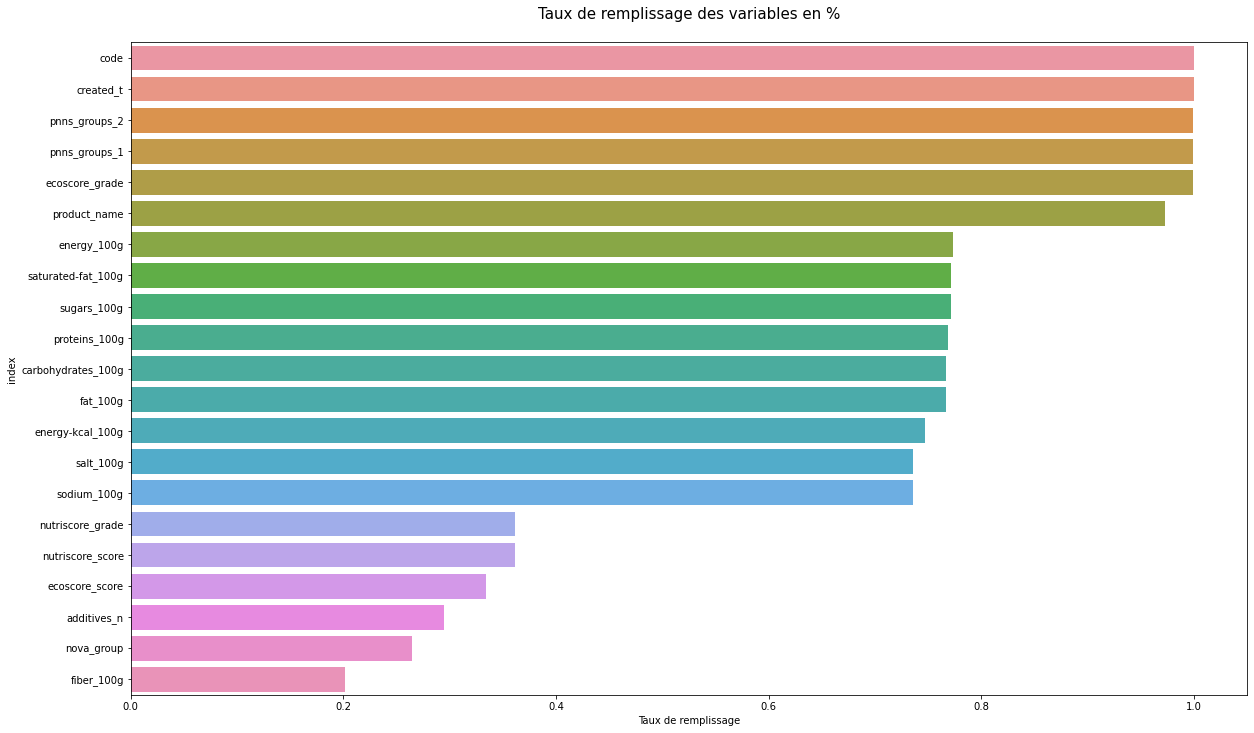

In [43]:
graphe_remplissage_variable(df)

<p class="h3"; style="color:blue">Traitement des valeurs abérrantes </p>

**Objectif** : Cette partie traite des valeurs aberrantes encore appélés outliers,  sont les valeurs situées à plus de 1,5 x Écart interquartile de la borne inférieure Q1 ou de la borne supérieure Q3.

In [44]:
quantitative_cols

Index(['created_t', 'nova_group', 'additives_n', 'energy_100g',
       'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',
       'salt_100g', 'sodium_100g', 'ecoscore_score', 'nutriscore_score'],
      dtype='object')

In [45]:
# Statistique descriptive des variables 

df.describe()

,nova_group,additives_n,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,ecoscore_score,nutriscore_score
count,238553.000000,265998.000000,6.974420e+05,6.732630e+05,6.913090e+05,695877.000000,691345.000000,693183.000000,695539.000000,182026.000000,663448.000000,663447.000000,301558.000000,325644.000000
mean,3.299803,1.566219,1.945524e+16,-7.230092e+12,1.446544e+12,6.045916,28.419955,8.882457,13.610364,3.567201,1.309251,0.523790,43.330011,9.388169
std,1.018885,2.331711,1.624765e+19,5.932479e+15,1.202718e+15,471.115118,1067.463451,10.072738,23.113946,155.353138,12.141855,4.857131,26.813705,8.782792
min,1.000000,0.000000,0.000000e+00,-4.867753e+18,0.000000e+00,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,-30.000000,-15.000000
25%,3.000000,0.000000,4.640000e+02,1.110000e+02,1.000000e+00,0.200000,2.500000,1.500000,0.600000,0.100000,0.060000,0.024000,24.000000,2.000000
50%,4.000000,1.000000,1.092000e+03,2.630000e+02,8.000000e+00,2.000000,14.000000,6.200000,3.400000,1.700000,0.530000,0.212000,40.000000,10.000000
75%,4.000000,2.000000,1.674000e+03,4.000000e+02,2.200000e+01,8.000000,52.000000,13.000000,19.000000,3.750000,1.300000,0.520000,66.000000,16.000000
max,4.000000,30.000000,1.356890e+22,4.000000e+04,1.000000e+18,388889.000000,882828.000000,850.000000,8888.000000,65656.000000,5677.000000,2270.800000,125.000000,40.000000


In [46]:
# Fonction permettant de d'afficher les stats descriptive de nos variables quantitatives

def quant_var_summary(df):
    data_frame = pd.DataFrame(columns=['Variable name','Variable type','Distinct','% distinct', 
                                     'Mean', 'Median', 'Skew', 'Kurtosis', 'Variance', 'Stdev', 
                                     'min','25%','50%','75%','max'])
    for col in df.columns:
        var_type = df[col].dtypes
        distinct = len(df[col].unique())
        percent_distinct = len(df[col].unique()) / len(df[col])
        
        if var_type != 'object' and var_type != "datetime64[ns]": 
            data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
                                                          df[col].mean(),df[col].median(),df[col].skew(),
                                                          df[col].kurtosis(),df[col].var(ddof=0),df[col].std(ddof=0),
                                                          df[col].min(),df[col].quantile(0.25),df[col].quantile(0.5),
                                                          df[col].quantile(0.75),df[col].max()]],
                                                        columns=['Variable name','Variable type','Distinct','% distinct',
                                                                 'Mean', 'Median','Skew', 'Kurtosis', 'Variance', 'Stdev',
                                                                 'min','25%','50%','75%','max']))
        else:
            data_frame 
            
            
    return data_frame          

In [47]:
df_quant_stats = quant_var_summary(df[quantitative_cols])

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWar

In [48]:
df_quant_stats

,Variable name,Variable type,Distinct,% distinct,Mean,Median,Skew,Kurtosis,Variance,Stdev,min,25%,50%,75%,max
0,nova_group,float64,5,0.000006,3.299803,4.0,-1.261347,0.253838,1.038123,1.018883,1.0,3.0,4.0,4.0,4.0
0,additives_n,float64,30,0.000033,1.566219,1.0,2.314091,7.534015,5.436857,2.331707,0.0,0.0,1.0,2.0,30.0
0,energy_100g,float64,4839,0.005368,19455239253316404.0,1092.0,835.12993,697442.0,263985836377863049404942121992106016768.0,16247640948084217856.0,0.0,464.0,1092.0,1674.0,13568900975311254978560.0
0,energy-kcal_100g,float64,8376,0.009291,-7230091798494.254883,263.0,-820.526051,673263.0,35194250897285371795939067428864.0,5932474264359296.0,-4867753294634129408.0,111.0,263.0,400.0,40000.0
0,fat_100g,float64,7233,0.008023,1446543875470.124756,8.0,831.449938,691308.999893,1446529053599261974708980023296.0,1202717362308893.5,0.0,1.0,8.0,22.0,1000000000000000000.0
0,saturated-fat_100g,float64,5467,0.006064,6.045916,2.0,810.629945,667451.950122,221949.135474,471.11478,0.0,0.2,2.0,8.0,388889.0
0,carbohydrates_100g,float64,9629,0.010681,28.419955,14.0,818.98711,676688.257556,1139476.570505,1067.462679,-1.0,2.5,14.0,52.0,882828.0
0,proteins_100g,float64,6123,0.006792,8.882457,6.2,4.148482,123.828265,101.459896,10.07273,0.0,1.5,6.2,13.0,850.0
0,sugars_100g,float64,7778,0.008628,13.610364,3.4,88.785848,32229.983744,534.253747,23.11393,-1.0,0.6,3.4,19.0,8888.0
0,fiber_100g,float64,2280,0.002529,3.567201,1.7,415.590279,175279.291872,24134.464762,155.352711,0.0,0.1,1.7,3.75,65656.0


nova_group               AxesSubplot(0.125,0.772143;0.168478x0.107857)
additives_n           AxesSubplot(0.327174,0.772143;0.168478x0.107857)
energy_100g           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
energy-kcal_100g      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
fat_100g                 AxesSubplot(0.125,0.642714;0.168478x0.107857)
saturated-fat_100g    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
carbohydrates_100g    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
proteins_100g         AxesSubplot(0.731522,0.642714;0.168478x0.107857)
sugars_100g              AxesSubplot(0.125,0.513286;0.168478x0.107857)
fiber_100g            AxesSubplot(0.327174,0.513286;0.168478x0.107857)
salt_100g             AxesSubplot(0.529348,0.513286;0.168478x0.107857)
sodium_100g           AxesSubplot(0.731522,0.513286;0.168478x0.107857)
ecoscore_score           AxesSubplot(0.125,0.383857;0.168478x0.107857)
nutriscore_score      AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype:

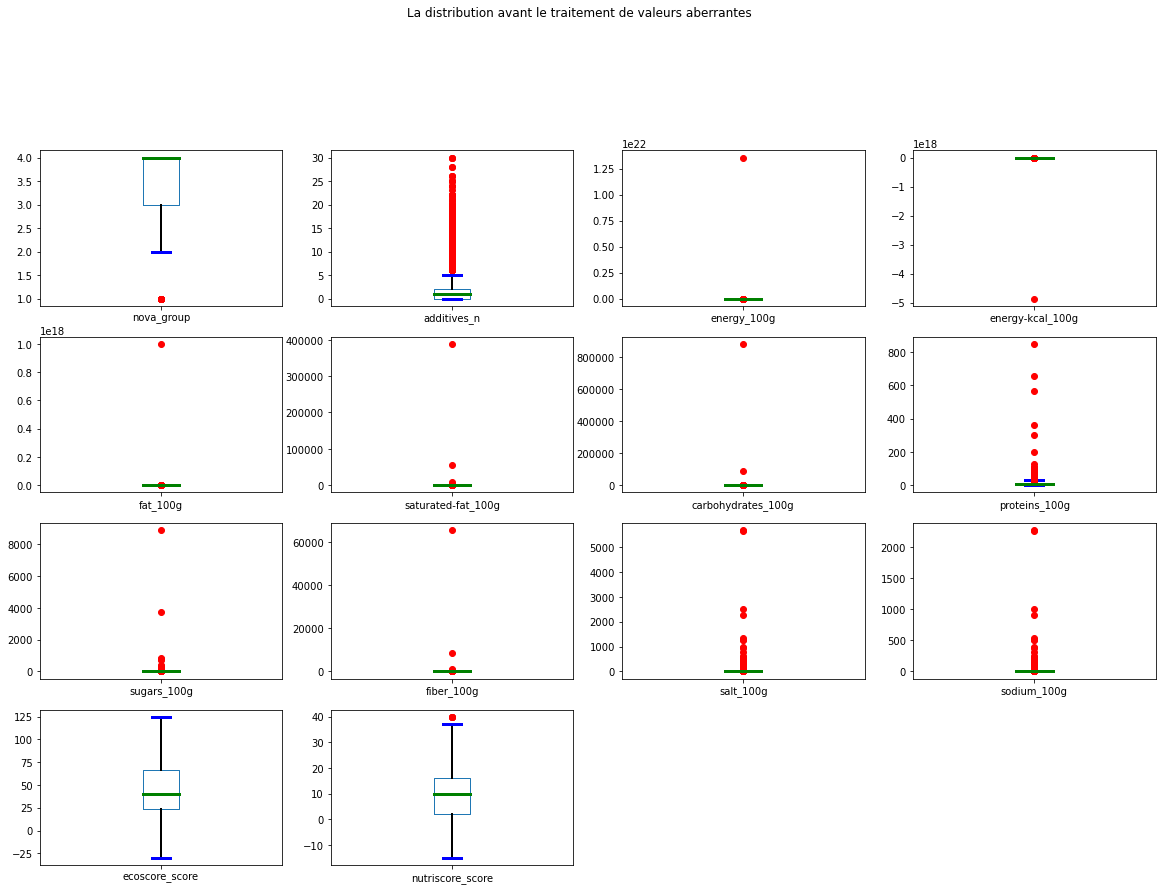

In [49]:
#Visualisation graphique de la distribution de chaque Variable avant le traitement :

df.select_dtypes(include=float).plot(kind="box",subplots=True,sym="ro",
                                            whiskerprops = {'color':'k','linewidth':2,'linestyle':'solid'},
                                            capprops={'color': 'blue', 'linewidth': 3, 'linestyle': 'solid'},
                                            medianprops = {'color':'green','linewidth': 3, 'linestyle': 'solid'},
                                            title="La distribution avant le traitement de valeurs aberrantes",
                                            figsize=(20,20),layout=(6,4)) 

En visualisant les distribitions de nos variables sous forme de box-plot, nous pouvons observer des valeurs extremes qui sont très éloignés de la moyenne 

**Méthode 1 - Traitement des outliers par suivant l'Interquartile**

In [50]:
#Traitement des valeurs aberrantes par la méthode interquartile :

df_inter_outlier = df.copy()


for col in df_inter_outlier.columns:
    if col!="nutrition-score-fr_100g" and col!="nutriscore_score":
                              # nutrition-score-fr_100g ne contient pas de valeurs aberrantes
        try:
            Q1=df_inter_outlier[col].quantile(0.25)
            Q3=df_inter_outlier[col].quantile(0.75)
            EI=Q3-Q1 #(écart interquartile)
            maximum=Q3+1.5*EI   #l’échelle est prise comme 1,5 
            minimum=Q1-1.5*EI   #toute donnée située au-delà de 2,7σ de la moyenne (μ), de part et d’autre
                                #doit être considérée comme aberrante. 
                                #Et cette plage de décision est la plus proche de ce que la distribution gaussienne 
                                #nous dit, c’est-à-dire 3σ
            # Q1 - 1.5 * IQR= -2.7σ et Q3 + 1.5 * IQR =  2.7σ
            
            #Tout point de données inférieur à la limit inférieure 
            #ou supérieur à la limite supérieure est considéré comme une valeur aberrante
            
            df_inter_outlier[col] = df_inter_outlier[col].apply(lambda x: maximum if x > maximum else x)
            df_inter_outlier[col] = df_inter_outlier[col].apply(lambda x: minimum if x < minimum else x)
            df_inter_outlier[col] = df_inter_outlier[col].apply(lambda x: 0 if x < 0  else x)
                                    #supprimer les valeurs négatives si elles existaient
        except:
            continue    

In [51]:
df_inter_stats = quant_var_summary(df_inter_outlier[quantitative_cols])

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWar

In [52]:
df_inter_stats

,Variable name,Variable type,Distinct,% distinct,Mean,Median,Skew,Kurtosis,Variance,Stdev,min,25%,50%,75%,max
0,nova_group,float64,5,0.000006,3.355913,4.0,-1.051051,-0.376258,0.804949,0.89719,1.5,3.0,4.0,4.0,4.0
0,additives_n,float64,7,0.000008,1.356927,1.0,1.043736,-0.258348,2.906107,1.704731,0.0,0.0,1.0,2.0,5.0
0,energy_100g,float64,4006,0.004444,1145.19155,1092.0,0.522954,-0.181334,627871.320934,792.383317,0.0,464.0,1092.0,1674.0,3489.0
0,energy-kcal_100g,float64,7540,0.008364,274.766659,263.0,0.519467,-0.177407,36106.457341,190.016992,0.0,111.0,263.0,400.0,833.5
0,fat_100g,float64,6435,0.007138,13.389162,8.0,1.134905,0.447006,212.992241,14.594254,0.0,1.0,8.0,22.0,53.5
0,saturated-fat_100g,float64,4325,0.004798,4.960481,2.0,1.241717,0.235456,38.513111,6.205893,0.0,0.2,2.0,8.0,19.7
0,carbohydrates_100g,float64,9605,0.010654,27.004206,14.0,0.736092,-0.81737,765.082466,27.660124,0.0,2.5,14.0,52.0,126.25
0,proteins_100g,float64,5001,0.005547,8.487429,6.2,1.027542,0.115427,67.503365,8.216043,0.0,1.5,6.2,13.0,30.25
0,sugars_100g,float64,5957,0.006608,12.033412,3.4,1.241699,0.039433,251.841484,15.869514,0.0,0.6,3.4,19.0,46.6
0,fiber_100g,float64,1524,0.001691,2.565551,1.7,1.160572,0.263322,7.930238,2.816068,0.0,0.1,1.7,3.75,9.225


**Méthode 2** 

Fields that end with _100g correspond to the amount of a nutriment (in g, or kJ for energy) for 100 g or 100 ml of product

Le nouveau règlement européen relatif à l'information des consommateurs sur les denrées alimentaires rend obligatoire la mention, sur les étiquettes des produits alimentaires, d'informations sur la valeur énergétique ainsi que la teneur totale en graisses, graisses saturées, glucides, sucres, protéines et sel pour 100 g de produit, ou pour 100 ml s'il s'agit d'un liquide. Ces informations peuvent également être exprimées par portion. En plus des valeurs absolues, les teneurs en nutriments peuvent être exprimées en pourcentage des apports de référence d'un adulte type (généralement appelés repères nutritionnels journaliers, RNJ), par rapport à 100 g ou 100 ml ou à une portion de taille standard. Ces repères correspondent aux recommandations nutritionnelles émises pour l'ensemble de la population et ont été définis aux fins d'étiquetage, sur la base d'un régime alimentaire de 2 000 kcal (8 400 kJ) : 70 g de matières grasses (31,5 % des apports énergétiques), 20 g de matières grasses saturées (9 % des apports énergétiques), 260 g de glucides (52 % des apports énergétiques), 90 g de sucres (18 % des apports énergétiques), 50 g de protéines et 6 g de sel.7,8

In [53]:
df_100g = df.filter(like='_100g', axis=1)
df_100g.columns

Index(['energy_100g', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',
       'salt_100g', 'sodium_100g'],
      dtype='object')

Pour les valeurs qui doivent être entre **0 et 100g**, une valeur négative ou >100g est aberrante sauf pour l'énergie

In [54]:
# Fonction de traitement des outliers

def delete_outliers(dataframe):
    '''Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme
    suppression des données négatives et des valeurs supérieures à 100 g pour les indices ramenés à 100 g'''
    #valeurs extremes
    
    
    
    for column in df_100g.columns.tolist() :
        index_nan = []
        index_nan_flat = []
        
        index_nan.append(dataframe.loc[dataframe[column] > dataframe[column].quantile(0.95)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < dataframe[column].quantile(0.05)].index.tolist())
        index_nan.append(dataframe.loc[dataframe[column] < 0].index.tolist())
        if (column[-5:] == '_100g') & (column != 'energy_100g'):
            index_nan.append(dataframe.loc[dataframe[column] > 100].index.tolist())
            
        for sublist in index_nan:
            for item in sublist:
                index_nan_flat.append(item)
                
#suppression des doublons
        index_nan_flat = list(dict.fromkeys(index_nan_flat))
        dataframe[column].loc[index_nan_flat] = np.nan
   
            
    return dataframe

In [55]:
df_100g_outliers = delete_outliers(df)

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/1681518535.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[index_nan_flat] = np.nan
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/1681518535.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column].loc[index_nan_flat] = np.nan
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/1681518535.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing

In [56]:
df_100g_stats = quant_var_summary(df_100g_outliers)

/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data_frame = data_frame.append(pd.DataFrame([[col,var_type,distinct,percent_distinct,
/var/folders/8y/dhqjv_h574s900xmlg8w791r0000gn/T/ipykernel_3338/3998554981.py:13: FutureWar

In [57]:
df_100g_stats

,Variable name,Variable type,Distinct,% distinct,Mean,Median,Skew,Kurtosis,Variance,Stdev,min,25%,50%,75%,max
0,nova_group,float64,5,0.000006,3.299803,4.0,-1.261347,0.253838,1.038123,1.018883,1.0,3.0,4.0,4.0,4.0
0,additives_n,float64,30,0.000033,1.566219,1.0,2.314091,7.534015,5.436857,2.331707,0.0,0.0,1.0,2.0,30.0
0,energy_100g,float64,3111,0.003451,1107.631578,1092.0,0.130237,-1.125959,433001.19521,658.028263,50.0,515.0,1092.0,1623.0,2427.0
0,energy-kcal_100g,float64,1852,0.002054,53.657788,50.0,0.218973,-1.009334,616.853218,24.83653,10.0,34.0,50.0,74.0,100.0
0,fat_100g,float64,6108,0.006775,11.35229,7.0,0.895838,-0.344752,140.911807,11.870628,0.0,0.9,7.0,20.0,45.8
0,saturated-fat_100g,float64,4375,0.004853,4.19159,1.7,1.391348,0.870492,28.66263,5.353749,0.0,0.15,1.7,6.4,20.3
0,carbohydrates_100g,float64,8653,0.009598,23.90033,12.0,0.715118,-1.00393,609.409183,24.686214,0.0,2.2,12.0,47.1,77.3
0,proteins_100g,float64,4767,0.005288,7.486047,5.9,0.922301,-0.126118,49.118131,7.008433,0.0,1.3,5.9,11.3,26.0
0,sugars_100g,float64,6611,0.007333,10.550288,3.0,1.621595,1.547132,224.486992,14.98289,0.0,0.5,3.0,14.0,58.0
0,fiber_100g,float64,1628,0.001806,2.232558,1.5,1.327771,1.158897,6.115443,2.472942,0.0,0.0,1.5,3.3,10.7


nova_group               AxesSubplot(0.125,0.772143;0.168478x0.107857)
additives_n           AxesSubplot(0.327174,0.772143;0.168478x0.107857)
energy_100g           AxesSubplot(0.529348,0.772143;0.168478x0.107857)
energy-kcal_100g      AxesSubplot(0.731522,0.772143;0.168478x0.107857)
fat_100g                 AxesSubplot(0.125,0.642714;0.168478x0.107857)
saturated-fat_100g    AxesSubplot(0.327174,0.642714;0.168478x0.107857)
carbohydrates_100g    AxesSubplot(0.529348,0.642714;0.168478x0.107857)
proteins_100g         AxesSubplot(0.731522,0.642714;0.168478x0.107857)
sugars_100g              AxesSubplot(0.125,0.513286;0.168478x0.107857)
fiber_100g            AxesSubplot(0.327174,0.513286;0.168478x0.107857)
salt_100g             AxesSubplot(0.529348,0.513286;0.168478x0.107857)
sodium_100g           AxesSubplot(0.731522,0.513286;0.168478x0.107857)
ecoscore_score           AxesSubplot(0.125,0.383857;0.168478x0.107857)
nutriscore_score      AxesSubplot(0.327174,0.383857;0.168478x0.107857)
dtype:

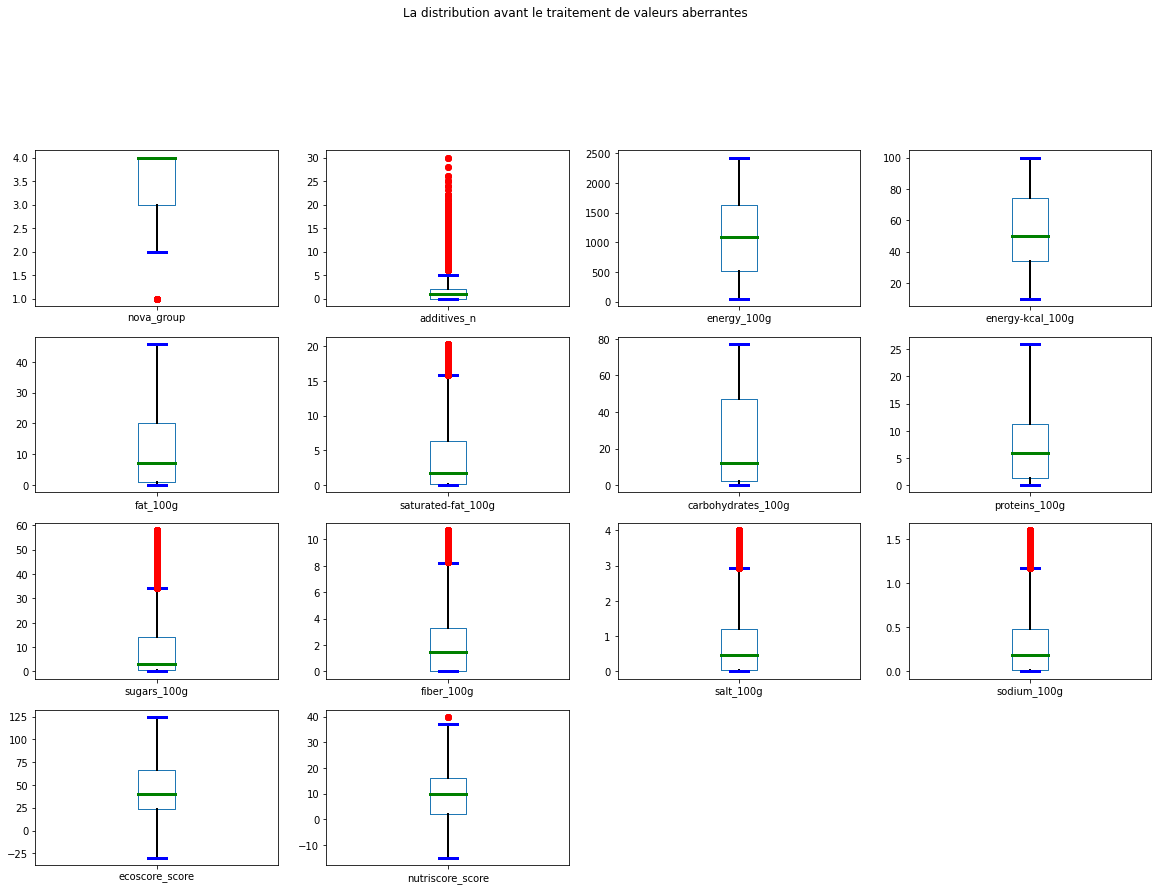

In [58]:
df_100g_outliers.select_dtypes(include=float).plot(kind="box",subplots=True,sym="ro",
                                            whiskerprops = {'color':'k','linewidth':2,'linestyle':'solid'},
                                            capprops={'color': 'blue', 'linewidth': 3, 'linestyle': 'solid'},
                                            medianprops = {'color':'green','linewidth': 3, 'linestyle': 'solid'},
                                            title="La distribution avant le traitement de valeurs aberrantes",
                                            figsize=(20,20),layout=(6,4)) 

In [59]:
df2 = df_100g_outliers

<p class="h3"; style="color:blue">Nettoyage des valeurs manquantes </p>

In [60]:
print_proportion_nan(df2)

Taille du jeu de données  (901500, 21)
 --> Proportion de NaN : 34.90%


**Analyse de la distribution des variables**

In [103]:
numerical_cols  = ['created_t', 'nova_group', 'energy_100g',
       'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',
       'salt_100g', 'sodium_100g',  'nutriscore_score']

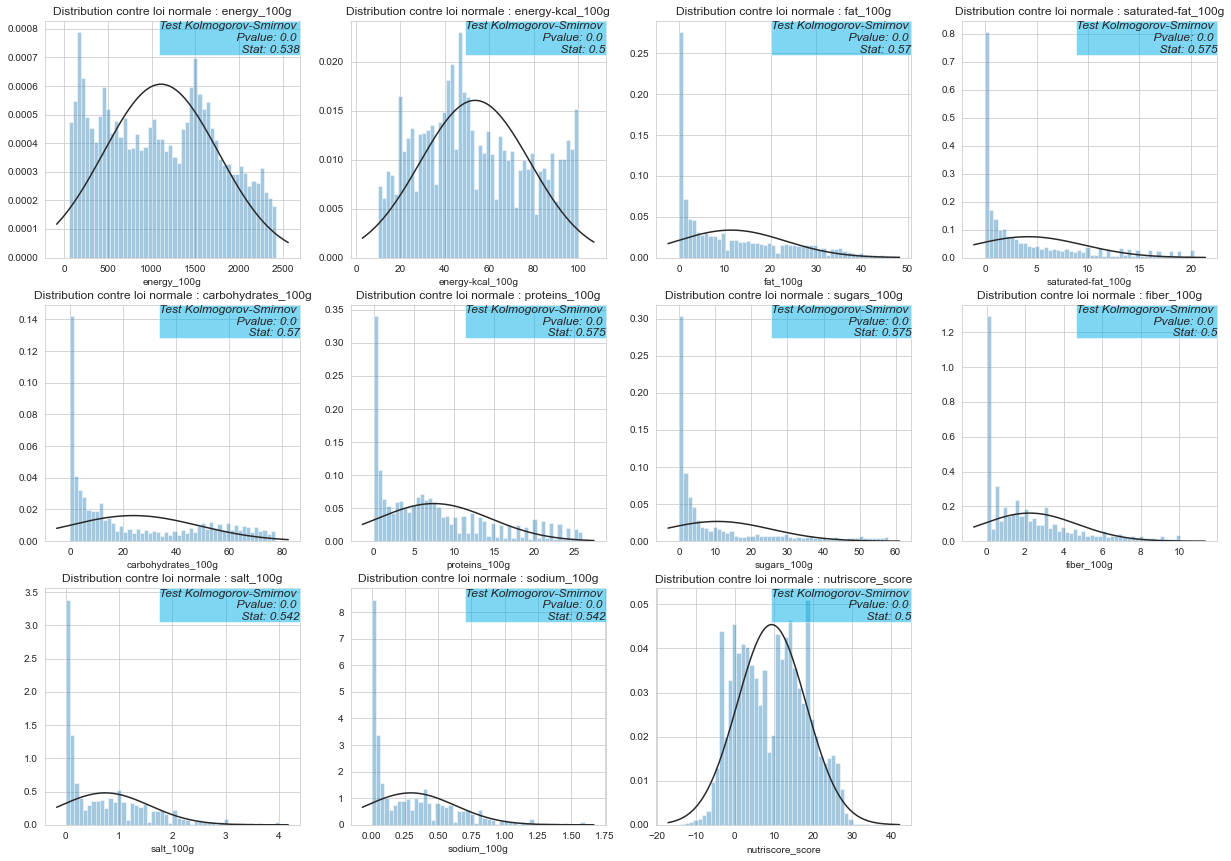

In [104]:
#regardons maintenant si la distribution de variables suivent une loi normale 
       
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))

#numerical_cols = list(df.select_dtypes(include=["float64","int64"]).columns)
numerical_cols 

sub = 0
for i in range(len(numerical_cols)):
    fig.add_subplot(4,4,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_cols[i]
    kstest = stats.kstest(df[colonne].notnull(),'norm')
    
    ax = sns.distplot(df[colonne], fit=stats.norm, kde=False)
    
    ax.set_title("Distribution contre loi normale : {}".format(colonne))
    
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.4} \n Stat: {:.3}'.
            format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    
    sub += 1
plt.show()

In [63]:
df2.head(1)

,code,product_name,created_t,pnns_groups_1,pnns_groups_2,nova_group,nutriscore_grade,ecoscore_grade,additives_n,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,ecoscore_score,nutriscore_score
0,00000000000000225,Jeunes pousses,2021-06-16 14:53:28,Unknown,Unknown,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [64]:
data_set_overview(df2)

******** Dataset Overview *****

Shape of the Dataset : (901500, 21)
Number of variables : 21
  - Num. Quant variables : 14
  - Num. Quali variables : 6
Number of obervations : 901500
Number of cells : 18931500
Missing cells : 6607858
Missing cells in % : 34.90%
Duplicate rows : 4
Duplicate rows in % : 0.0004%

************** End ************


In [65]:
df2.corr().style.background_gradient(cmap='coolwarm')

,nova_group,additives_n,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,ecoscore_score,nutriscore_score
nova_group,1.000000,0.426805,0.162689,0.183097,0.218023,0.132705,0.159886,0.034045,0.244748,-0.053735,0.225449,0.225437,-0.170175,0.342481
additives_n,0.426805,1.000000,0.085083,0.031417,0.057341,0.081045,0.121951,-0.076937,0.141453,-0.098302,0.091637,0.091616,-0.159152,0.208148
energy_100g,0.162689,0.085083,1.000000,0.902207,0.685059,0.542940,0.579374,0.194363,0.406673,0.358614,0.062330,0.062327,-0.192920,0.636115
energy-kcal_100g,0.183097,0.031417,0.902207,1.000000,0.176898,0.184845,0.236231,0.409844,0.173706,0.145976,0.159747,0.159748,-0.112734,-0.048976
fat_100g,0.218023,0.057341,0.685059,0.176898,1.000000,0.798416,0.119065,0.341224,0.204755,0.166173,0.269178,0.269171,-0.313520,0.671560
saturated-fat_100g,0.132705,0.081045,0.542940,0.184845,0.798416,1.000000,0.079070,0.249783,0.199302,0.015881,0.171513,0.171508,-0.271403,0.652181
carbohydrates_100g,0.159886,0.121951,0.579374,0.236231,0.119065,0.079070,1.000000,-0.116861,0.641297,0.432671,-0.202872,-0.202876,0.167364,0.228779
proteins_100g,0.034045,-0.076937,0.194363,0.409844,0.341224,0.249783,-0.116861,1.000000,-0.231140,0.213284,0.412940,0.412946,-0.367774,0.034899
sugars_100g,0.244748,0.141453,0.406673,0.173706,0.204755,0.199302,0.641297,-0.231140,1.000000,0.151528,-0.305922,-0.305935,-0.026014,0.413395
fiber_100g,-0.053735,-0.098302,0.358614,0.145976,0.166173,0.015881,0.432671,0.213284,0.151528,1.000000,-0.002678,-0.002682,0.099805,-0.158389


**Phase 1** : Variable "product_name"

In [66]:
df_prod_name = df2.copy()

In [67]:
df_prod_name = df_prod_name.dropna(subset=['product_name'], inplace=False)

In [68]:
print_proportion_nan(df_prod_name)

Taille du jeu de données  (877099, 21)
 --> Proportion de NaN : 33.90%


**Phase 2** : Variable "pnns_groups_1 & 2"

In [69]:
df_group_1 = df_prod_name.copy()

In [70]:
df_group_1['pnns_groups_1'].unique()

array(['Unknown', 'Fat and sauces', 'Composite foods', 'Sugary snacks',
       'Fruits and vegetables', 'Fish meat eggs', 'Beverages',
       'Milk and dairy products', 'Cereals and potatoes', 'Salty snacks',
       'Alcoholic beverages', nan], dtype=object)

In [71]:
df_group_1.groupby(by='pnns_groups_1')['code'].nunique().sort_values(ascending=False)

pnns_groups_1
Unknown                    504661
Sugary snacks               76788
Fish meat eggs              65330
Milk and dairy products     43391
Cereals and potatoes        34666
Composite foods             30629
Beverages                   29338
Fruits and vegetables       29297
Fat and sauces              27227
Salty snacks                23307
Alcoholic beverages         12374
Name: code, dtype: int64

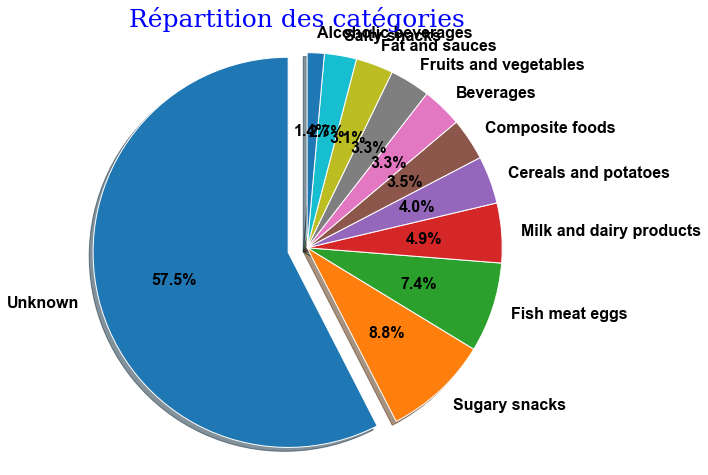

In [72]:
categories = df_group_1.groupby(by='pnns_groups_1')['code'].nunique().sort_values(ascending=False)

font = {'family': 'serif',
        'color':  'blue',
        'weight': 'normal',
        'size': 25,
        }

explodes = np.zeros(11)
explodes[0] = .1
fig1, ax1 = plt.subplots(figsize = (8, 8))
ax1.pie(categories, labels=categories.index, explode=explodes, autopct='%1.1f%%',shadow=True, startangle=90,
       textprops=dict(color="black",size=16, weight="bold"))
ax1.axis('equal') 
plt.title("Répartition des catégories", fontdict=font)
plt.show()

In [73]:
#pendant le traitement des categories on a remarqué qu'il y a plus de 50%  des prosuits 'unknown'
        ##dans pnns_groups_2 
#Nous allons imputer (remplacer) les valeurs unknow par Nan

df_group_1['pnns_groups_1'].replace('Unknown', np.nan, inplace=True)

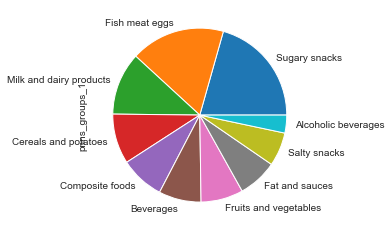

In [74]:
df_group_1['pnns_groups_1'].value_counts(normalize=True).plot(kind='pie')
plt.show()

In [75]:
df_group_2 = df_group_1.copy()

df_group_2['pnns_groups_2'].unique()

array(['Unknown', 'Dressings and sauces', 'One dish meals',
       'Biscuits and cakes', 'Fruits', 'Meat', 'Sweets',
       'Sweetened beverages', 'Cheese', 'Bread', 'Fish and seafood',
       'Salty and fatty products', 'Fruit juices', 'Dried fruits', 'Fats',
       'Dairy desserts', 'Milk and yogurt', 'Pizza pies and quiches',
       'Legumes', 'Unsweetened beverages', 'Cereals',
       'Alcoholic beverages', 'Nuts', 'Appetizers', 'Pastries',
       'Processed meat', 'Vegetables', 'Breakfast cereals', 'Sandwiches',
       'Ice cream', 'Soups', 'Teas and herbal teas and coffees',
       'Chocolate products', 'Potatoes',
       'Artificially sweetened beverages', 'Eggs',
       'Plant based milk substitutes', 'Offals',
       'Waters and flavored waters', 'Fruit nectars'], dtype=object)

In [76]:
df_group_2.groupby(by='pnns_groups_2')['code'].nunique().sort_values(ascending=False)

pnns_groups_2
Unknown                             504661
Sweets                               32703
Biscuits and cakes                   29645
One dish meals                       24605
Processed meat                       24573
Meat                                 23184
Cheese                               22293
Dressings and sauces                 17568
Cereals                              15727
Fish and seafood                     14317
Vegetables                           13408
Alcoholic beverages                  12375
Milk and yogurt                      11561
Salty and fatty products             11306
Fats                                  9659
Sweetened beverages                   9589
Fruits                                9329
Chocolate products                    9235
Bread                                 8124
Appetizers                            7459
Fruit juices                          6550
Unsweetened beverages                 5463
Pastries                              52

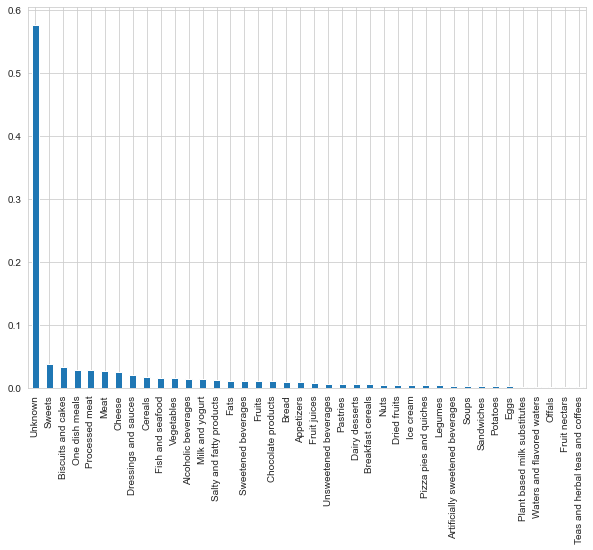

In [77]:
# Diagramme en tuyaux d'orgues
fig, ax = plt.subplots(figsize=(10, 7))

#df2_groups['pnns_groups_1'].value_counts().plot(kind='bar')
df_group_2['pnns_groups_2'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [78]:
#pendant le traitement des categories on a remarqué qu'il y a plus de 50%  des prosuits 'unknown'
        ##dans pnns_groups_2 
#Nous allons imputer (remplacer) les valeurs unknow par Nan

df_group_2['pnns_groups_2'].replace('Unknown', np.nan, inplace=True)

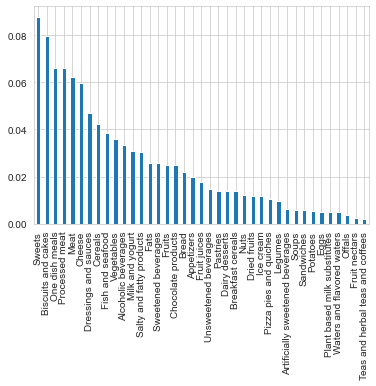

In [79]:
df_group_2['pnns_groups_2'].value_counts(normalize=True).plot(kind='bar')
plt.show()

In [80]:
df3 = df_group_2.loc[~df_group_2["pnns_groups_1"].isnull(),:]

In [81]:
print_proportion_nan(df3)

Taille du jeu de données  (372362, 21)
 --> Proportion de NaN : 22.85%


In [82]:
df3 = df_group_2.loc[~df_group_2["pnns_groups_2"].isnull(),:]

In [83]:
print_proportion_nan(df3)

Taille du jeu de données  (372364, 21)
 --> Proportion de NaN : 22.85%


In [84]:
data_set_overview(df3)

******** Dataset Overview *****

Shape of the Dataset : (372364, 21)
Number of variables : 21
  - Num. Quant variables : 14
  - Num. Quali variables : 6
Number of obervations : 372364
Number of cells : 7819644
Missing cells : 1786582
Missing cells in % : 22.85%
Duplicate rows : 0
Duplicate rows in % : 0.0000%

************** End ************


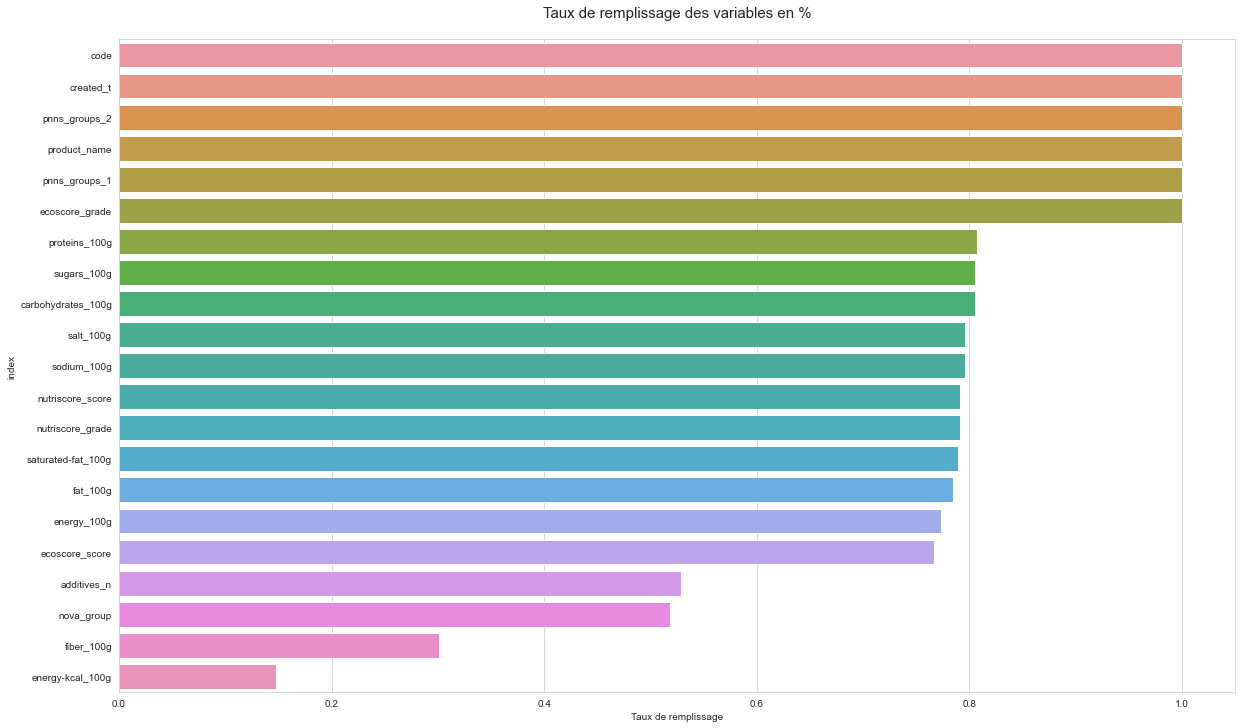

In [85]:
graphe_remplissage_variable(df3)

In [86]:
df3.head()

,code,product_name,created_t,pnns_groups_1,pnns_groups_2,nova_group,nutriscore_grade,ecoscore_grade,additives_n,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,ecoscore_score,nutriscore_score
3,0000000000100,moutarde au moût de raisin,2015-10-11 14:09:21,Fat and sauces,Dressings and sauces,NaN,D,c,0.0,936.0,NaN,8.2,2.2,29.0,5.1,22.0,0.0,NaN,NaN,55.0,18.0
13,0000000000949,Salade de carottes râpées,2018-04-11 10:00:13,Composite foods,One dish meals,NaN,B,b,NaN,134.0,32.0,0.3,0.1,5.3,0.9,3.9,NaN,0.42,0.168,78.0,1.0
21,0000000001281,Tarte noix de coco,2018-02-05 11:40:01,Sugary snacks,Biscuits and cakes,NaN,D,unknown,NaN,1594.0,NaN,22.0,15.5,27.3,4.6,21.9,4.4,0.10,0.040,NaN,14.0
32,0000000001885,Compote de poire,2017-11-20 12:18:57,Fruits and vegetables,Fruits,NaN,A,b,NaN,657.0,NaN,0.0,0.0,36.0,0.6,27.0,3.6,0.00,0.000,76.0,-2.0
34,0000000002103,Aiguillettes de poulet,2018-10-15 18:52:04,Fish meat eggs,Meat,NaN,NaN,d,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.0,NaN


 **Phase 3** : Imputtion par la moyenne
 

Pour remplacer les valeurs manquantes des variables quantitative nous allons: 
- Grouper les données par valeur de groupe PNNS 2
- Pour chaque groupe PNNS 2, remplacer les valeurs NaN de la colonne concernée par la valeur moyenne de ce groupe sur l'échantillon (groupe PNNS 2)


Cette façon de procéder donnera de meilleurs résultats que d'utiliser simplement la valeur moyenne sur l'ensemble du jeu de données.

In [87]:
def remplacerValeurs(data, column, values):
    '''
        Cette fonction remplace les valeurs d'une colonne par d'autres valeurs
        
        ----------------
        - data   : DataFrame contenant les valeurs à remplacer
        - column : Colonne contenant les valeurs à remplacer
        - values : Un dictionnaire contenant les valeurs à remplacer et les nouvelles valeurs
        
        Returns
        ---------------
        _
    '''
    
    for value_error, value_correct in values.items():
        data.loc[data[column] == value_error, column] = value_correct
        

In [88]:
def remplacerValeursNaN(data, cols, criterion, valueType):
    '''
        Remplace les valeurs NaN dans une liste des colonnes données 
        regroupées selon un critère par le mode ou la moyenne 
        selon que la colonne est une variable quantitative ou qualitativz("QUANT" ou "QUAL")
        
        ----------------
        - data      : DataFrame contenant les valeurs NaN
        - cols      : Liste contenant les noms des colonnes dans lesquelles remplacer les valeurs NaN
        - criterion : Critère de regroupement des données
        - valueType : Le type des variables dans cols ("QUAL" or "QUANT")
        
        Returns
        ---------------
        _
    '''
    
    for column in cols:
        if criterion != None:
            value_per_criterion = {}

            for val_criterion, data_df in data.groupby([criterion]):
                if valueType == "QUAL":
                    value_per_criterion[val_criterion] = data_df[column].mode()[0]
                elif valueType == "QUANT":
                    value_per_criterion[val_criterion] = data_df[column].median()

            for criterion_value, value in value_per_criterion.items():
                data.loc[data[criterion] == criterion_value, column] \
                = \
                data.loc[data[criterion] == criterion_value, column].fillna(value)
        else:
            if valueType == "QUAL":
                value = data[column].mode()[0]
            elif valueType == "QUANT":
                value = data[column].median()
            else:
                raise Exception("Invalid value type :" + valueType)

            data[column] = data.loc[:, column].fillna(value)

In [89]:
def remplacerNaNVarQualitative(data, qualitative_cols, criterion=None):
    '''        
        Remplace les valeurs NaN dans une liste des colonnes (qualitatives) 
        regroupées selon un critère par le mode 
        
        ----------------
        - data             : DataFrame contenant les valeurs NaN
        - qualitative_cols : Liste contenant les noms des colonnes dans lesquelles remplacer les valeurs NaN
        - criterion        : Critère de regroupement des données
        
        Returns
        ---------------
        _
    '''
    
    remplacerValeursNaN(data, qualitative_cols, criterion, "QUAL")

In [90]:
def remplacerNaNVarQuantitative(data, quantitative_cols, criterion=None):
    '''        
        Remplace les valeurs NaN dans une liste des colonnes (quantitatives) 
            regroupées selon un critère par la moyenne
        
        ----------------
        - data             : DataFrame contenant les valeurs NaN
        - qualitative_cols : Liste contenant les noms des colonnes dans lesquelles remplacer les valeurs NaN
        - criterion        : Critère de regroupement des données
        
        Returns
        ---------------
        _
    '''
    
    remplacerValeursNaN(data, quantitative_cols, criterion, "QUANT")
              

In [91]:
# Pour les variables quantitatives (except nutriscore_score), 
# remplacer par la valeur mean en groupant par groupe pnn2

quantitative_cols = ['energy_100g', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
                       'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
                       'salt_100g', 'sodium_100g', 'fiber_100g']


df_quant_impute = remplacerNaNVarQuantitative(df3, quantitative_cols, "pnns_groups_2")

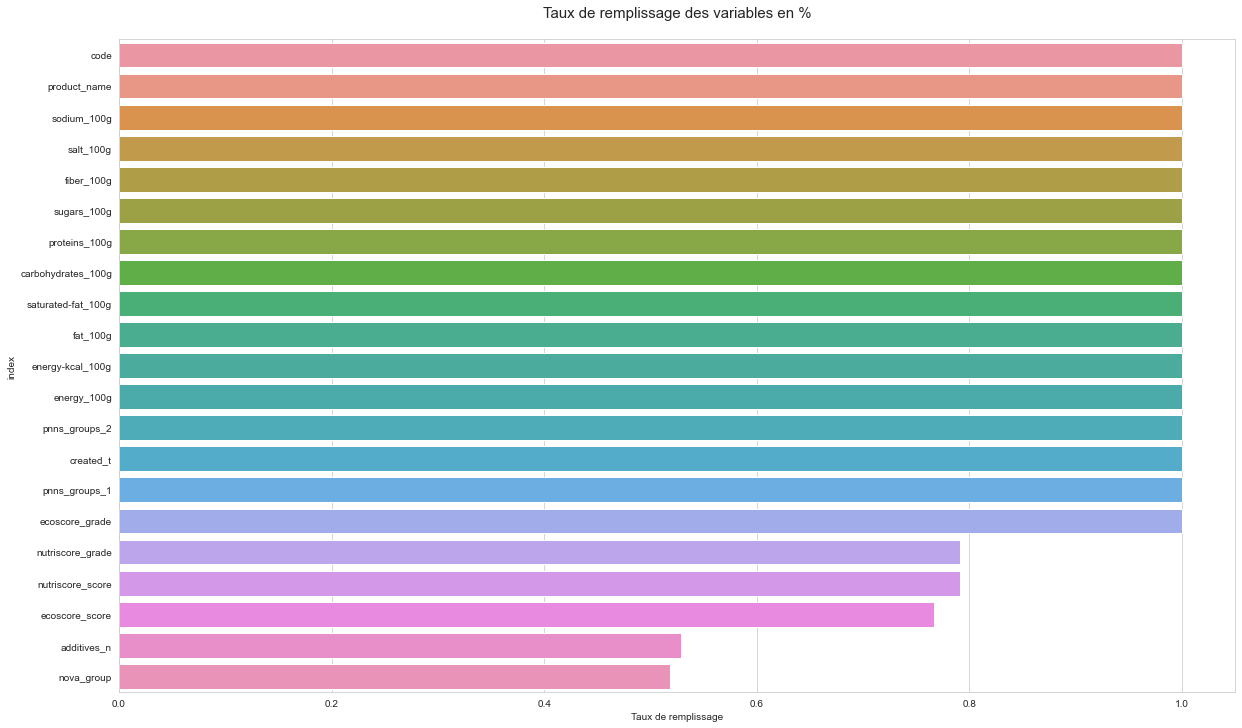

In [92]:
graphe_remplissage_variable(df3)

**Phase 4 - Suppression des colonnes**

In [93]:
df3.columns

Index(['code', 'product_name', 'created_t', 'pnns_groups_1', 'pnns_groups_2',
       'nova_group', 'nutriscore_grade', 'ecoscore_grade', 'additives_n',
       'energy_100g', 'energy-kcal_100g', 'fat_100g', 'saturated-fat_100g',
       'carbohydrates_100g', 'proteins_100g', 'sugars_100g', 'fiber_100g',
       'salt_100g', 'sodium_100g', 'ecoscore_score', 'nutriscore_score'],
      dtype='object')

In [94]:
df4 = df3.drop(columns=['ecoscore_grade', 'additives_n',
                        'nova_group', 'ecoscore_score'])

In [95]:
print_proportion_nan(df4)

Taille du jeu de données  (372364, 17)
 --> Proportion de NaN : 2.45%


In [96]:
df4.head(1)

,code,product_name,created_t,pnns_groups_1,pnns_groups_2,nutriscore_grade,energy_100g,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,proteins_100g,sugars_100g,fiber_100g,salt_100g,sodium_100g,nutriscore_score
3,0000000000100,moutarde au moût de raisin,2015-10-11 14:09:21,Fat and sauces,Dressings and sauces,D,936.0,64.0,8.2,2.2,29.0,5.1,22.0,0.0,1.3,0.52,18.0


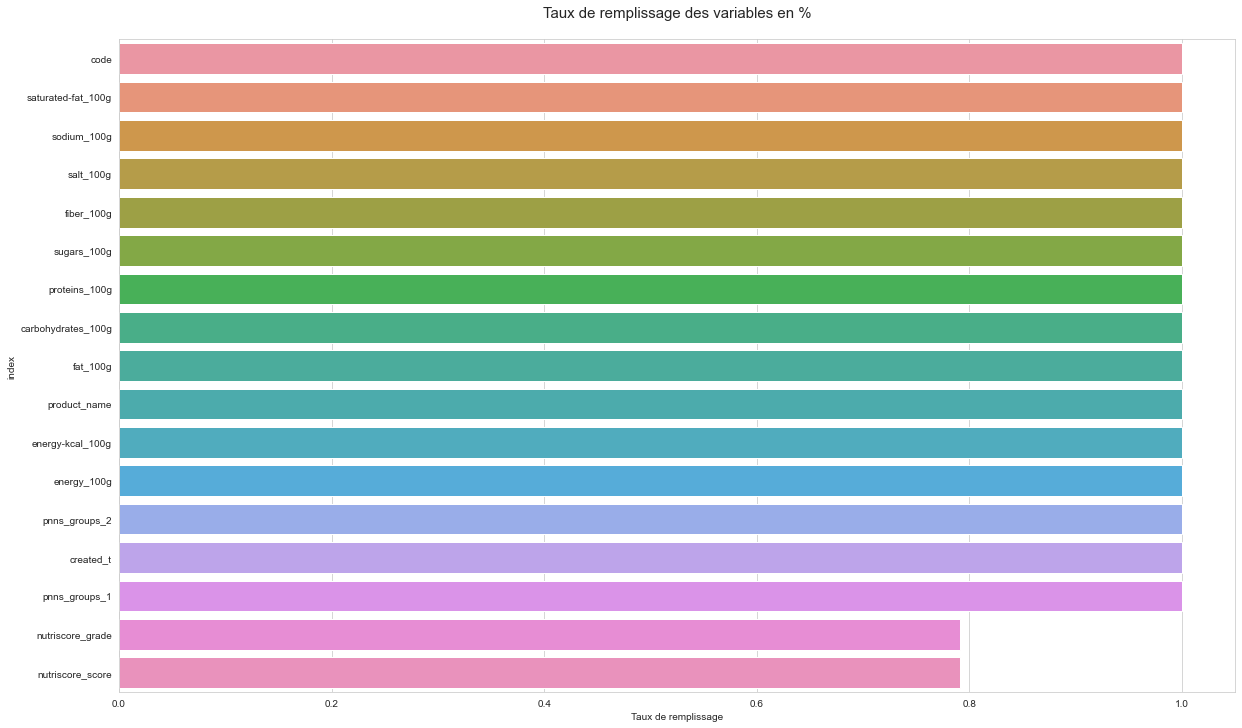

In [97]:
graphe_remplissage_variable(df4)

In [99]:
ms_values_overview(df4)


               ********************** Missing Value Summary *****************              



,Variable type,Is Missing ?,Count Missing,Count Notnull,Missing,% of Missing
code,object,False,0,372364,0.000000,0.0
salt_100g,float64,False,0,372364,0.000000,0.0
fiber_100g,float64,False,0,372364,0.000000,0.0
sugars_100g,float64,False,0,372364,0.000000,0.0
proteins_100g,float64,False,0,372364,0.000000,0.0
carbohydrates_100g,float64,False,0,372364,0.000000,0.0
saturated-fat_100g,float64,False,0,372364,0.000000,0.0
sodium_100g,float64,False,0,372364,0.000000,0.0
fat_100g,float64,False,0,372364,0.000000,0.0
energy_100g,float64,False,0,372364,0.000000,0.0



               ********************** Missing Value Summary *****************              



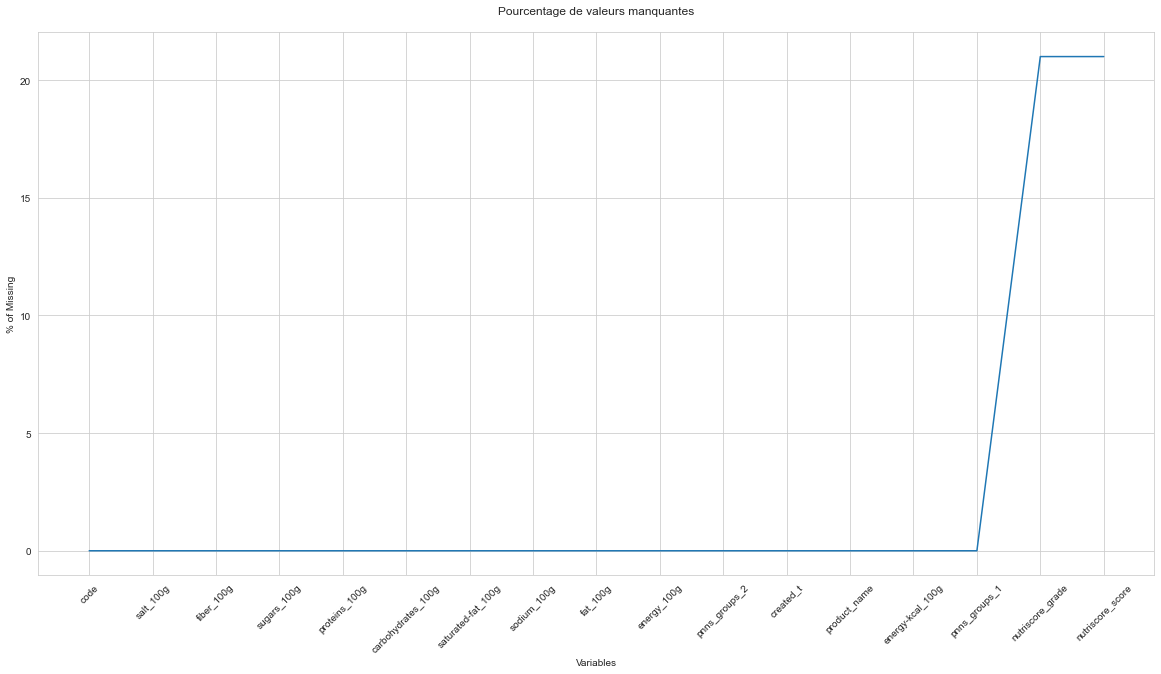

In [100]:
# % Visualisation des valeurs manquantes

import matplotlib.pyplot as plt

to_plot = ms_values_overview(df4)

#row selected values 
x_labels = to_plot.index
y_values = to_plot['% of Missing']


fig = plt.figure(figsize=(20,10))
ax = plt.axes()

plt.xticks(rotation=45)

plt.plot(x_labels, y_values)
plt.title("Pourcentage de valeurs manquantes\n")
plt.xlabel('Variables')
plt.ylabel('% of Missing')

plt.show()

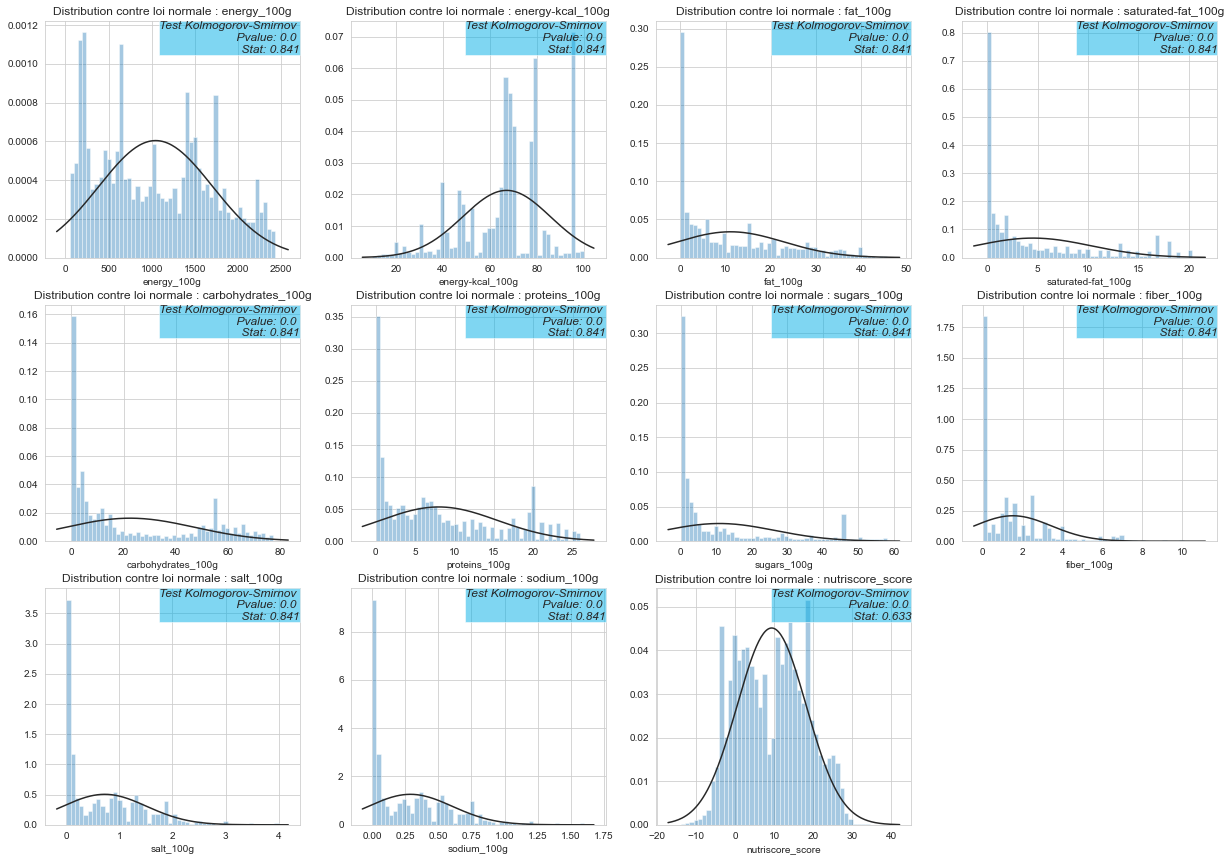

In [105]:
#regardons maintenant si la distribution de variables suivent une loi normale 
       
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,20))
numerical_cols = list(df4.select_dtypes(include=["float64","int64"]).columns)
sub = 0
for i in range(len(numerical_cols)):
    fig.add_subplot(4,4,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = numerical_cols[i]
    kstest = stats.kstest(df4[colonne].notnull(),'norm')
    
    ax = sns.distplot(df4[colonne], fit=stats.norm, kde=False)
    
    ax.set_title("Distribution contre loi normale : {}".format(colonne))
    
    ax.text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.4} \n Stat: {:.3}'.
            format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=ax.transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})
    
    sub += 1
plt.show()

In [102]:
df4.to_csv('data_cleaned.csv')